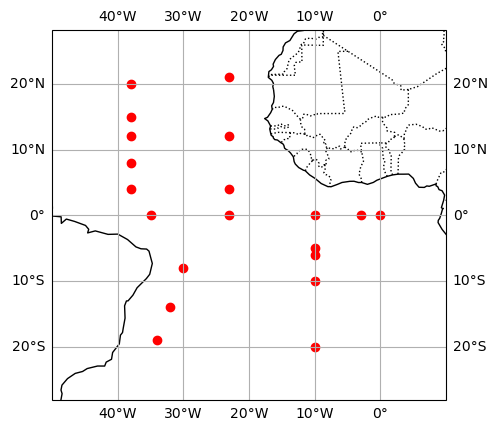

In [1]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Função para ler as coordenadas lat/lon de um arquivo NetCDF
def ler_coordenadas(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]  # Substitua 'lat' pelo nome correto da variável de latitude
    lon = ds.variables['lon'][:]  # Substitua 'lon' pelo nome correto da variável de longitude
    return lat, lon

# Caminho para a pasta contendo os arquivos NetCDF
caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/AirT/*.cdf"

# Usando glob para criar uma lista com todos os arquivos NetCDF na pasta
arquivos_netCDF = glob.glob(caminho_pasta)

# Criar a figura e o subplot com projeção PlateCarree (mapa)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Adicionando os recursos do mapa
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-50, 10, -25, 25])  # Ajuste os limites para focar no Oceano Atlântico

# Adicionando linhas de grade
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
# Loop para ler cada arquivo, extrair as coordenadas e plotar no mapa
for arquivo in arquivos_netCDF:
    lat, lon = ler_coordenadas(arquivo)
    ax.plot(lon, lat, 'ro', transform=ccrs.Geodetic())  # 'ro' cria pontos vermelhos
    

plt.show()


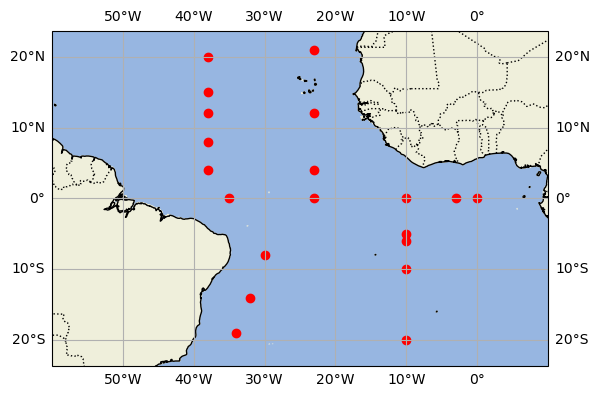

In [6]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Função para ler as coordenadas lat/lon de um arquivo NetCDF
def ler_coordenadas(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]  # Certifique-se de substituir 'lat' pelo nome correto da variável de latitude
    lon = ds.variables['lon'][:]  # Certifique-se de substituir 'lon' pelo nome correto da variável de longitude
    return lat, lon

# Caminho para a pasta contendo os arquivos NetCDF
caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/AirT/*.cdf"

# Usando glob para criar uma lista com todos os arquivos NetCDF na pasta
arquivos_netCDF = glob.glob(caminho_pasta)

# Criar a figura e o subplot com projeção PlateCarree (mapa)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Adicionando imagens de alta resolução do terreno e oceano
terreno = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                      edgecolor='face',
                                      facecolor=cfeature.COLORS['land'],
                                      linewidth=1)
oceano = cfeature.NaturalEarthFeature('physical', 'ocean', '10m',
                                     edgecolor='face',
                                     facecolor=cfeature.COLORS['water'],
                                     linewidth=1)
ax.add_feature(oceano, zorder=0)
ax.add_feature(terreno, zorder=1)

ax.add_feature(cfeature.BORDERS, linestyle=':', zorder=2)
ax.add_feature(cfeature.COASTLINE, zorder=2)

# Ajuste os limites para focar no Oceano Atlântico
ax.set_extent([-60, 10, -20, 20])

# Adicionando linhas de grade
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Loop para ler cada arquivo, extrair as coordenadas e plotar no mapa
for arquivo in arquivos_netCDF:
    lat, lon = ler_coordenadas(arquivo)
    ax.plot(lon, lat, 'ro', transform=ccrs.Geodetic())  # 'ro' cria pontos vermelhos

plt.show()


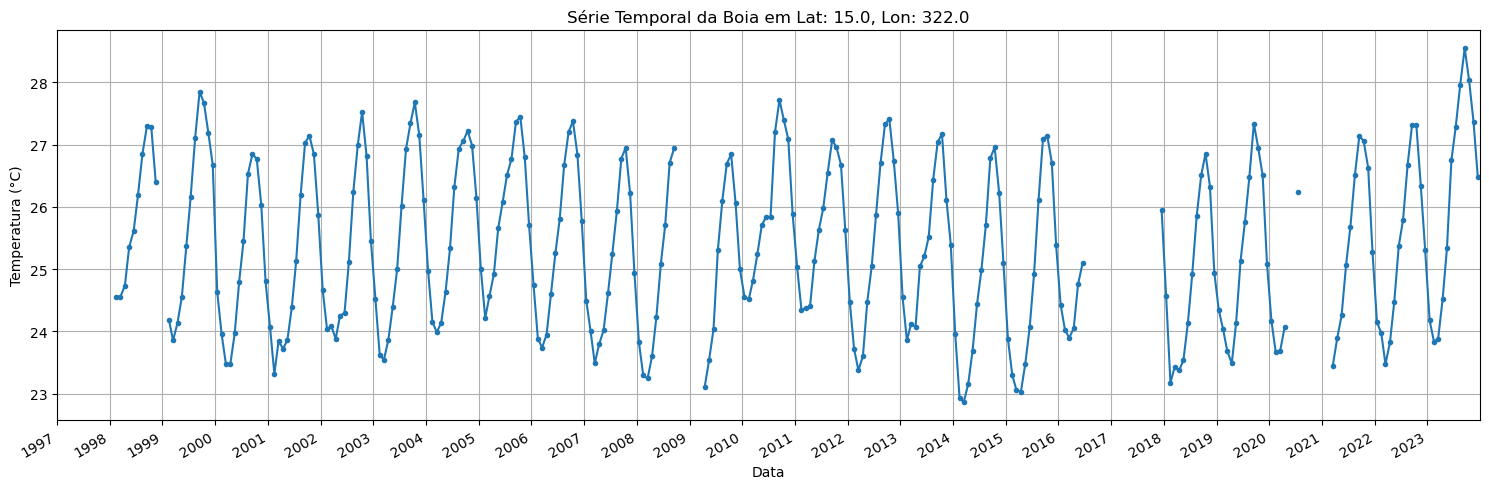

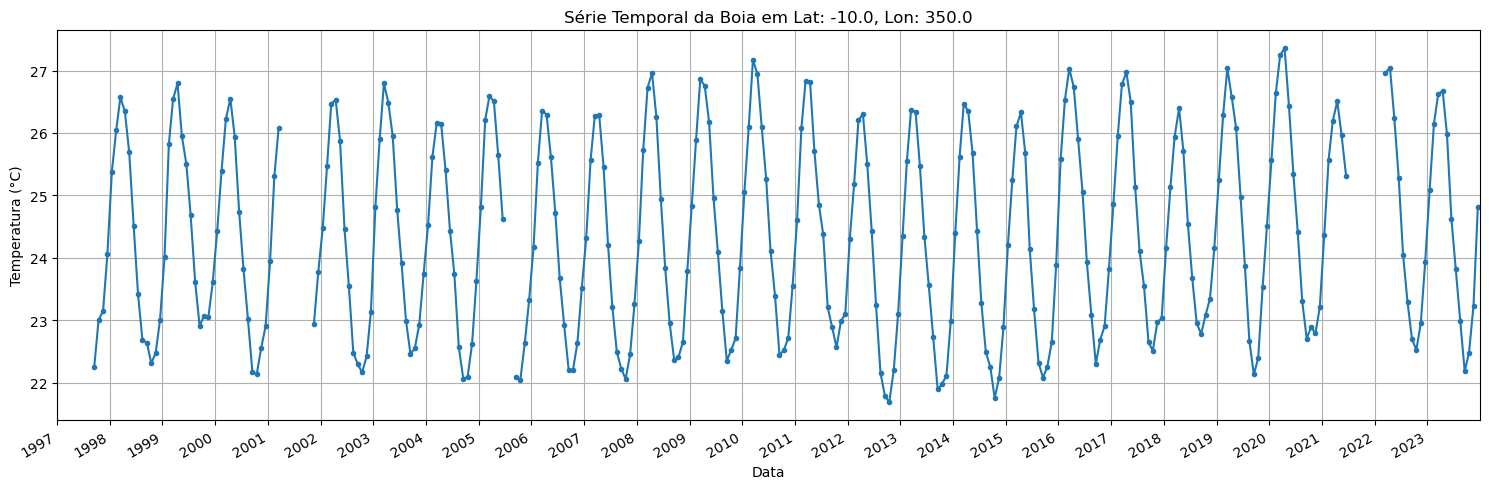

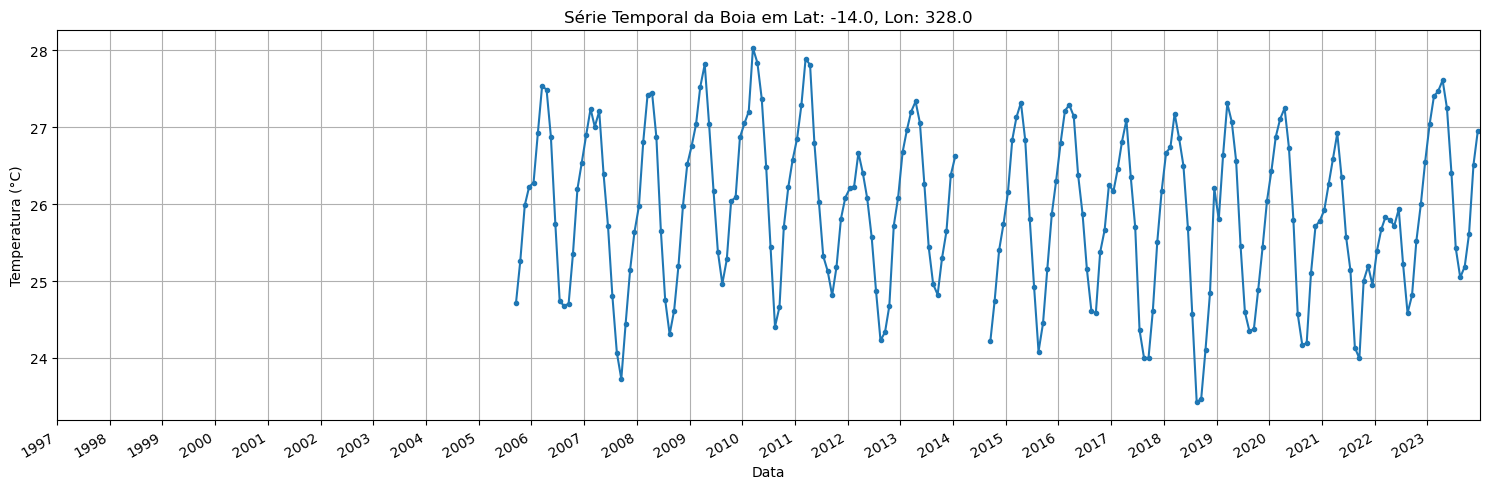

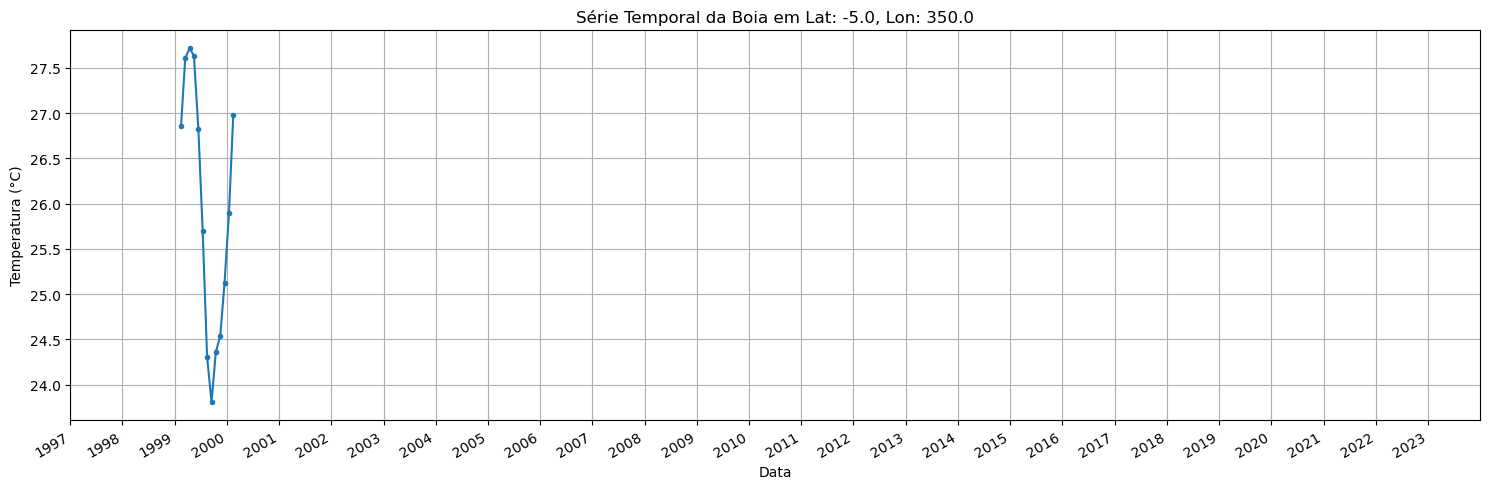

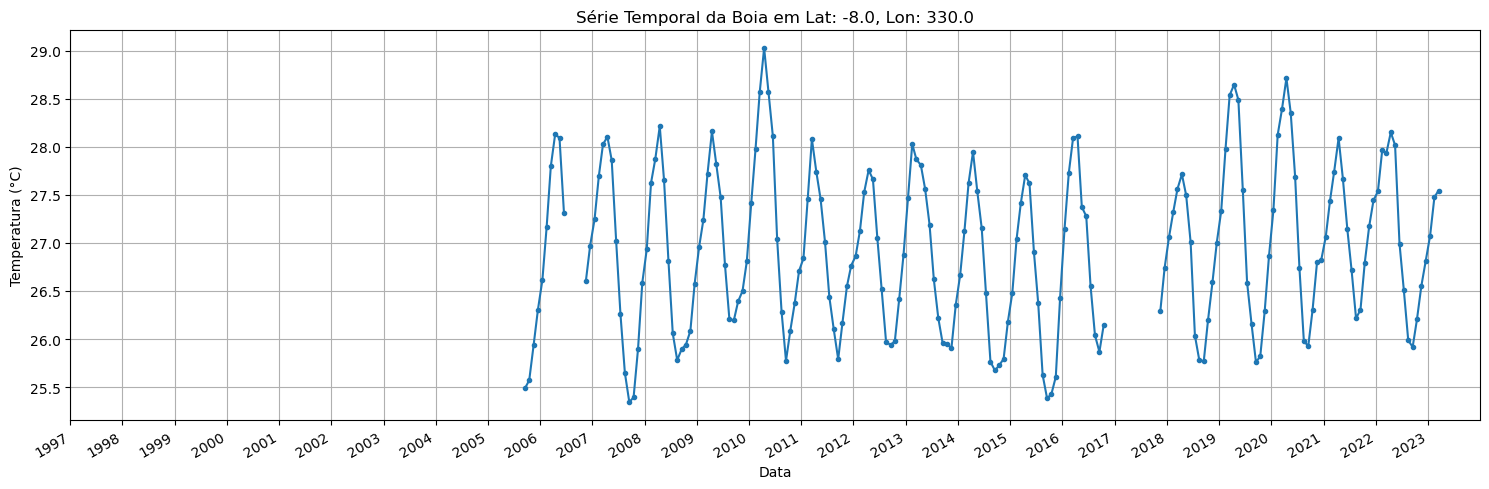

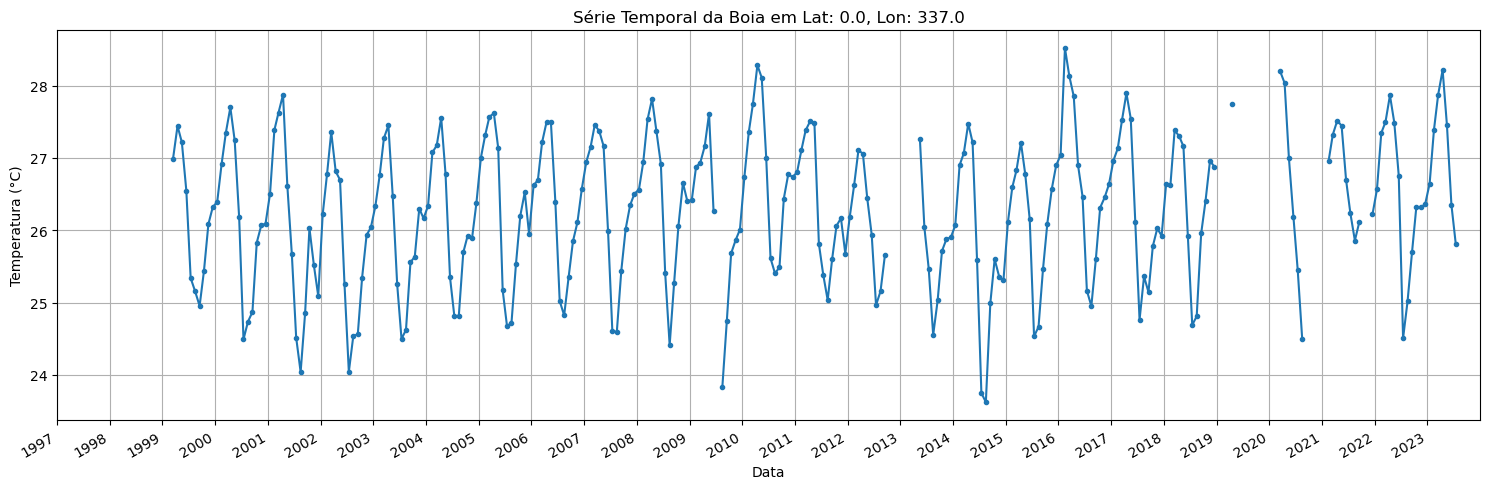

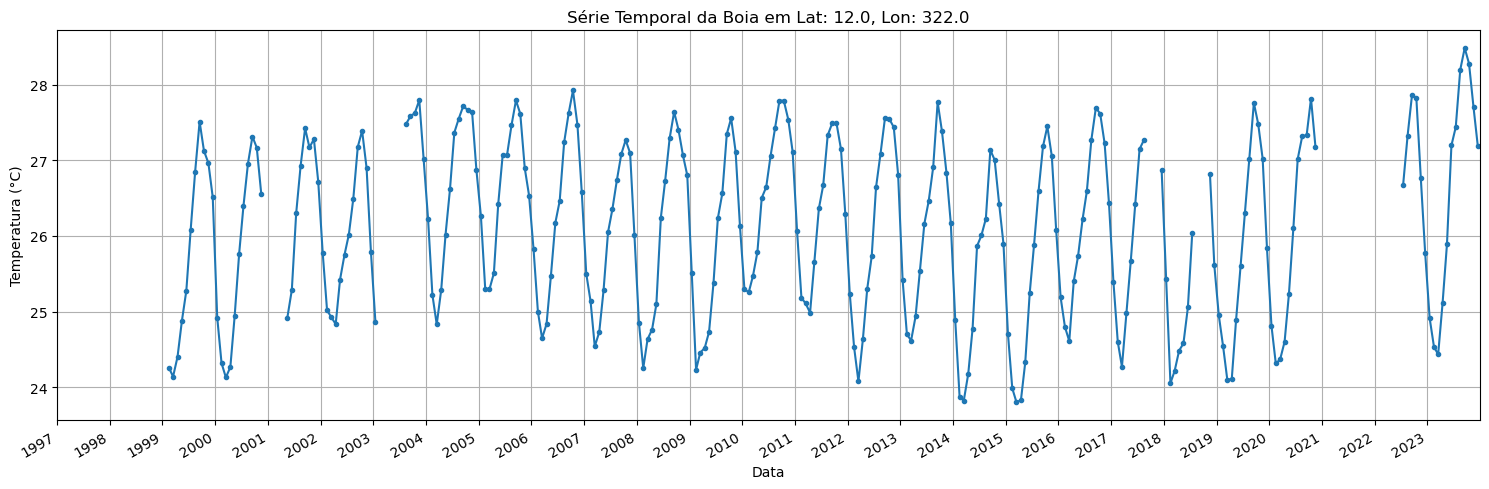

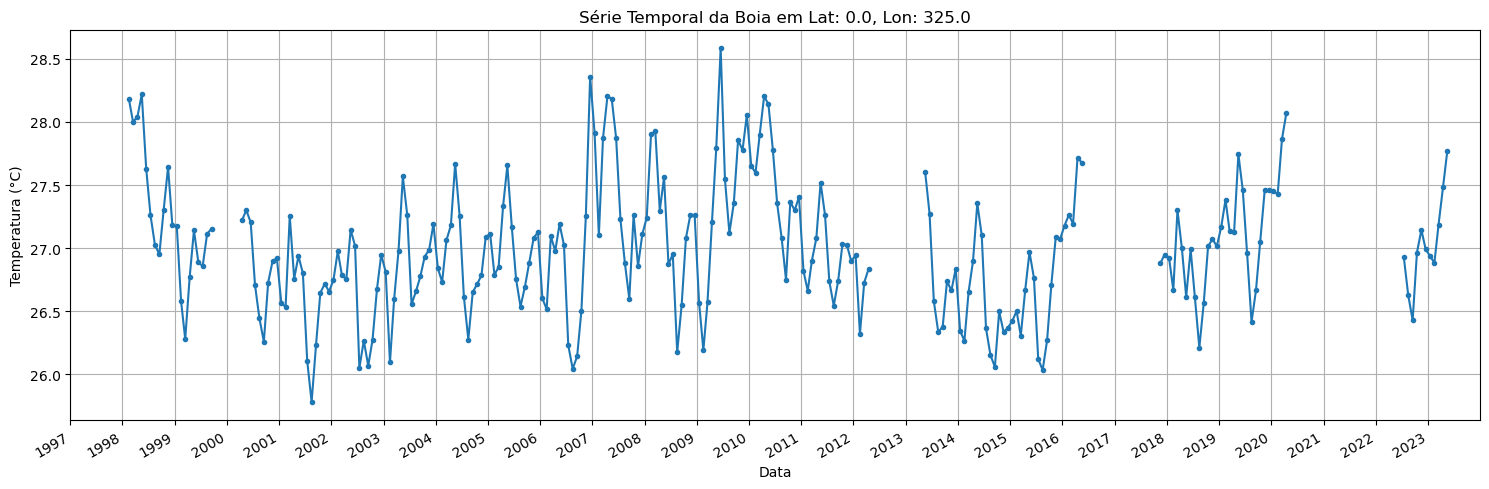

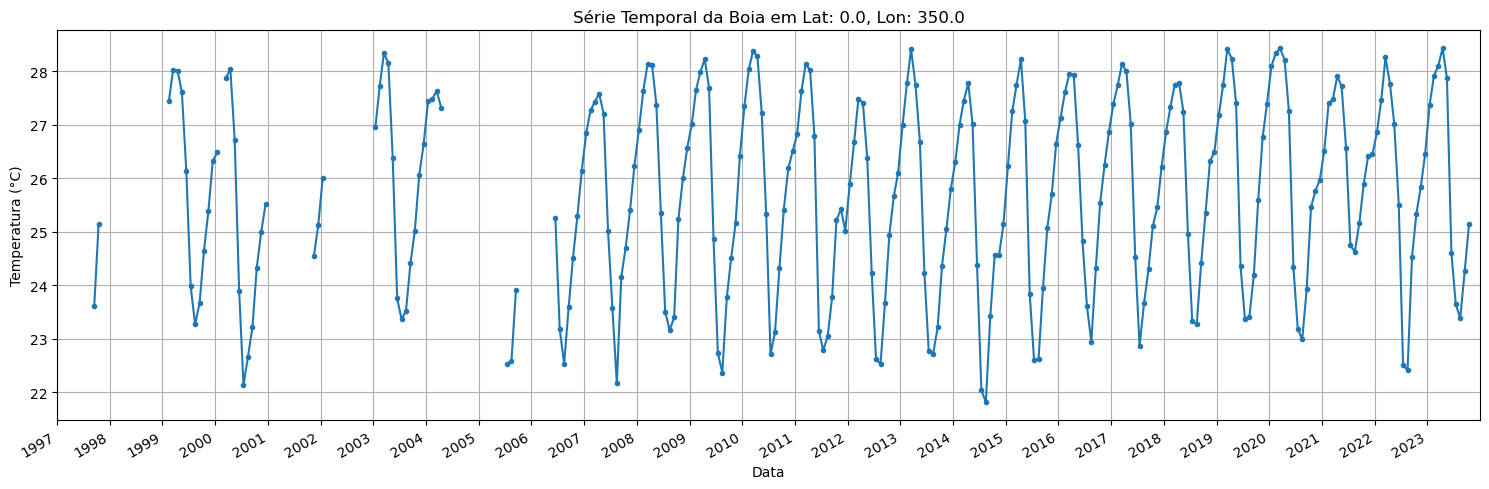

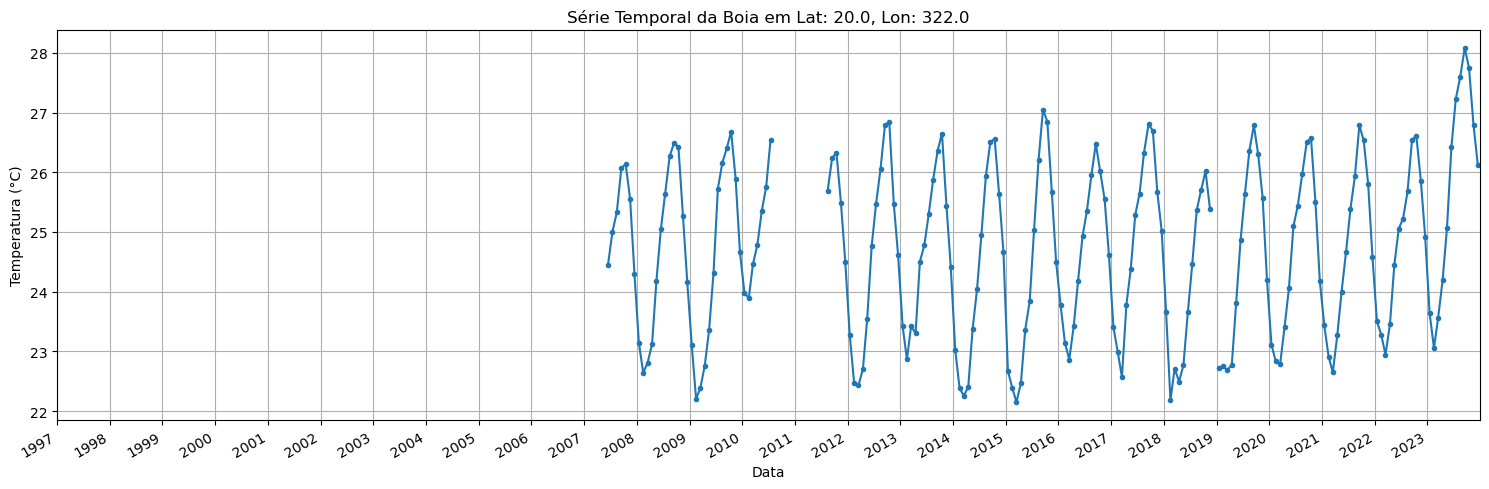

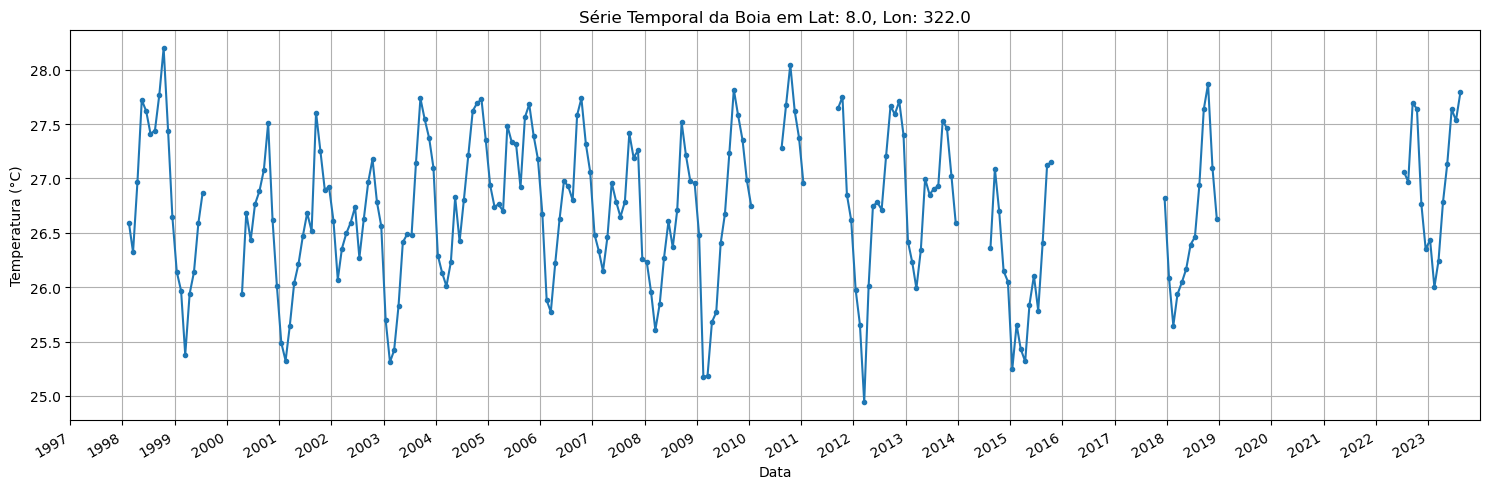

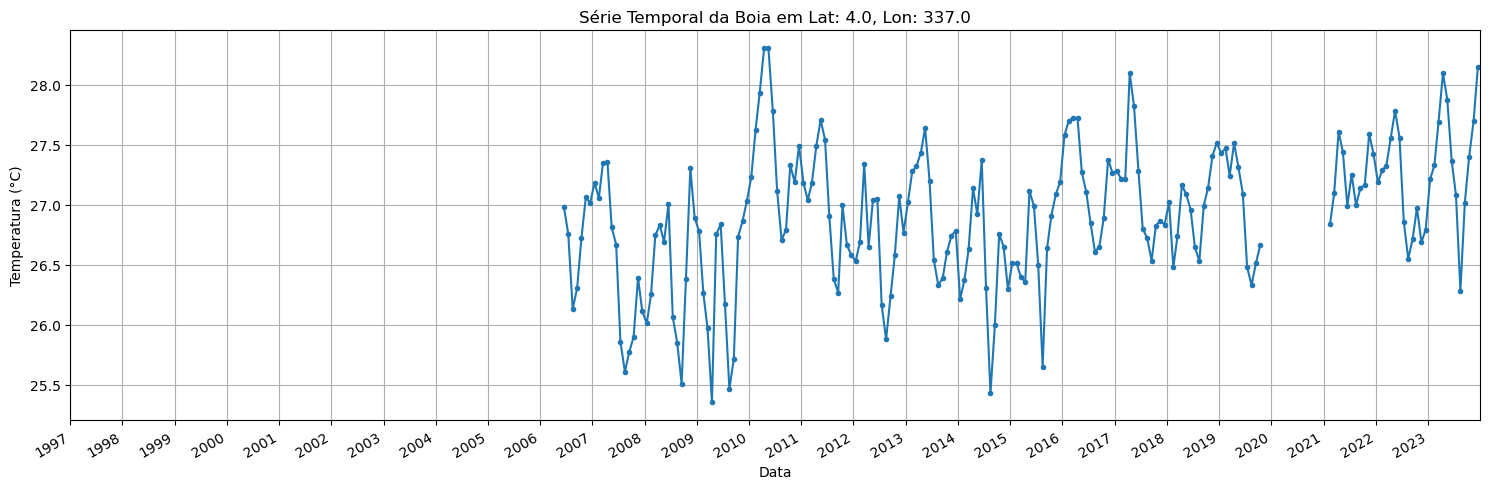

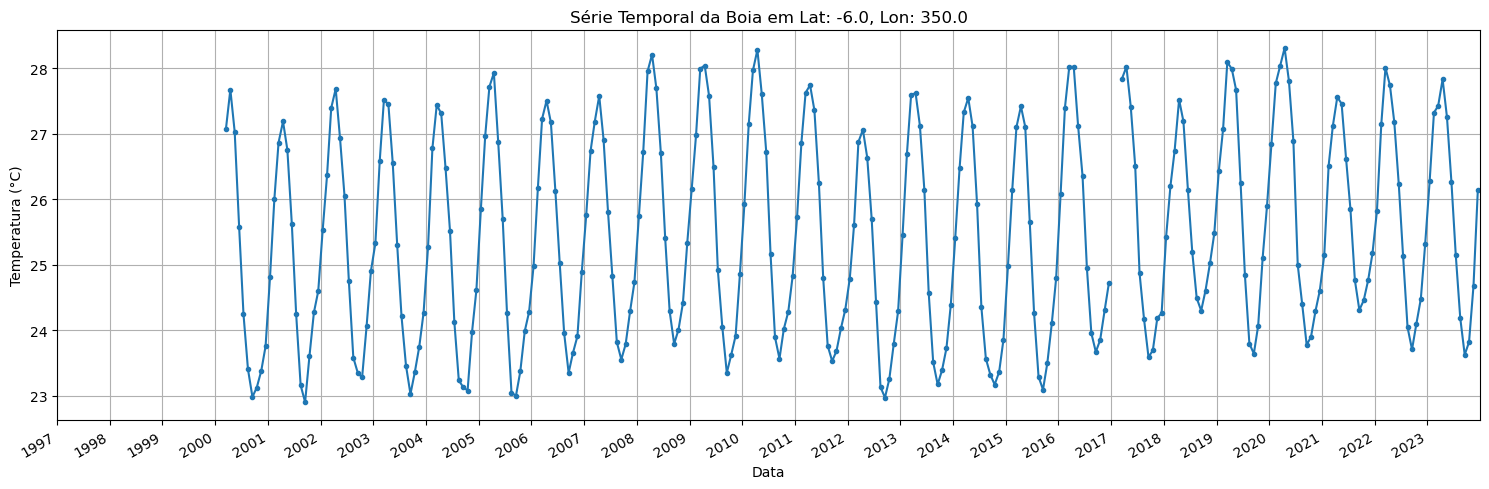

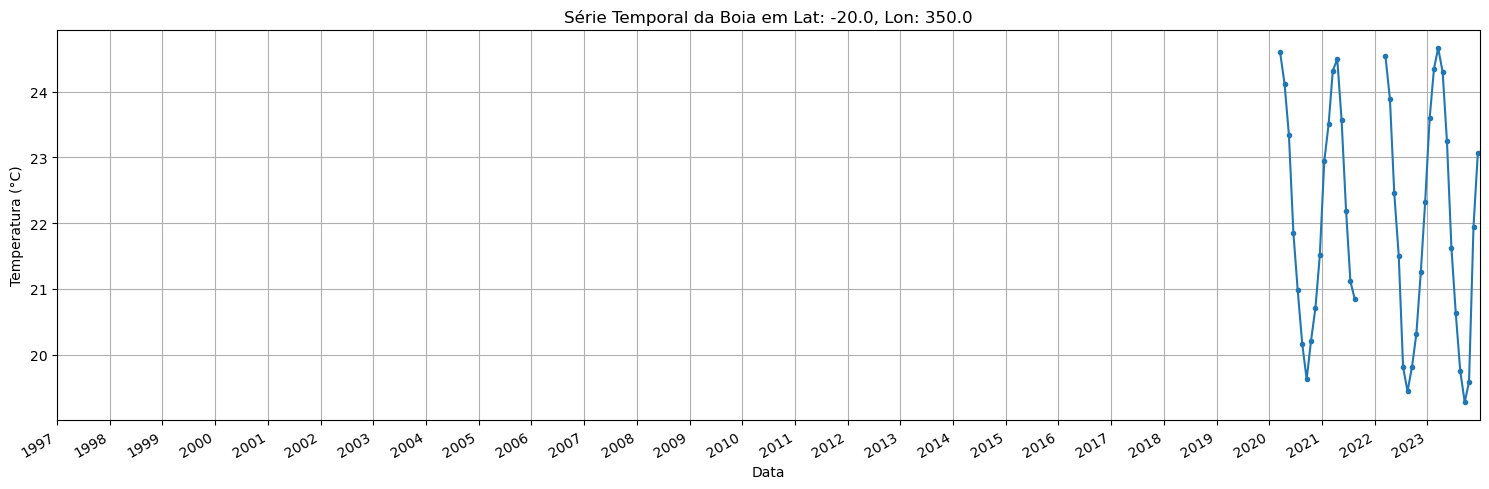

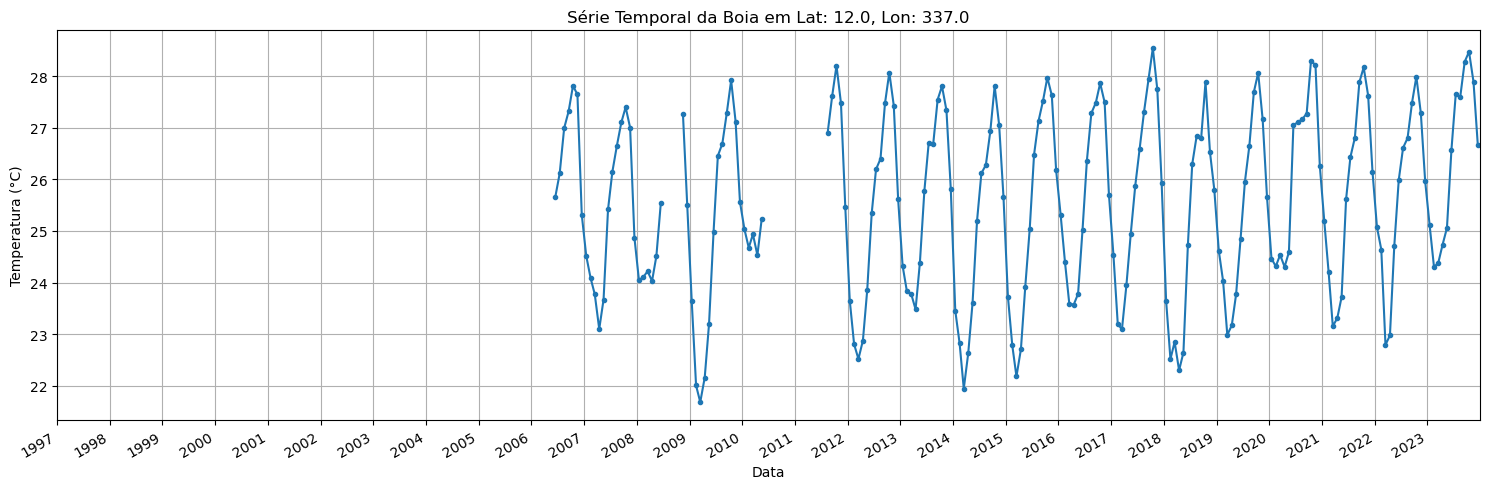

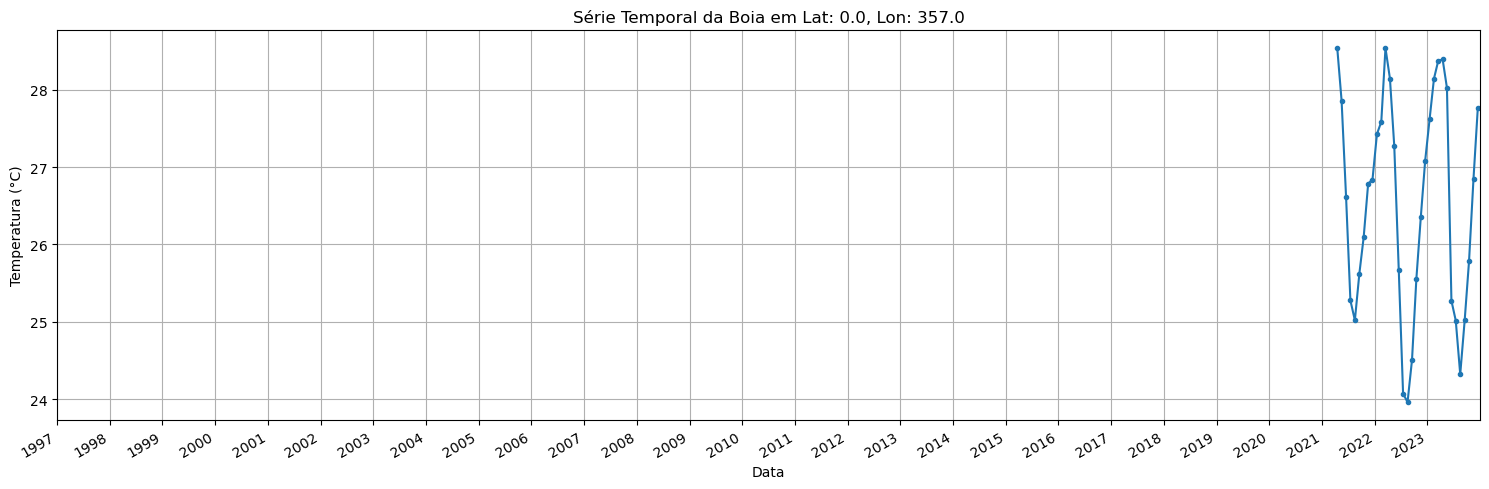

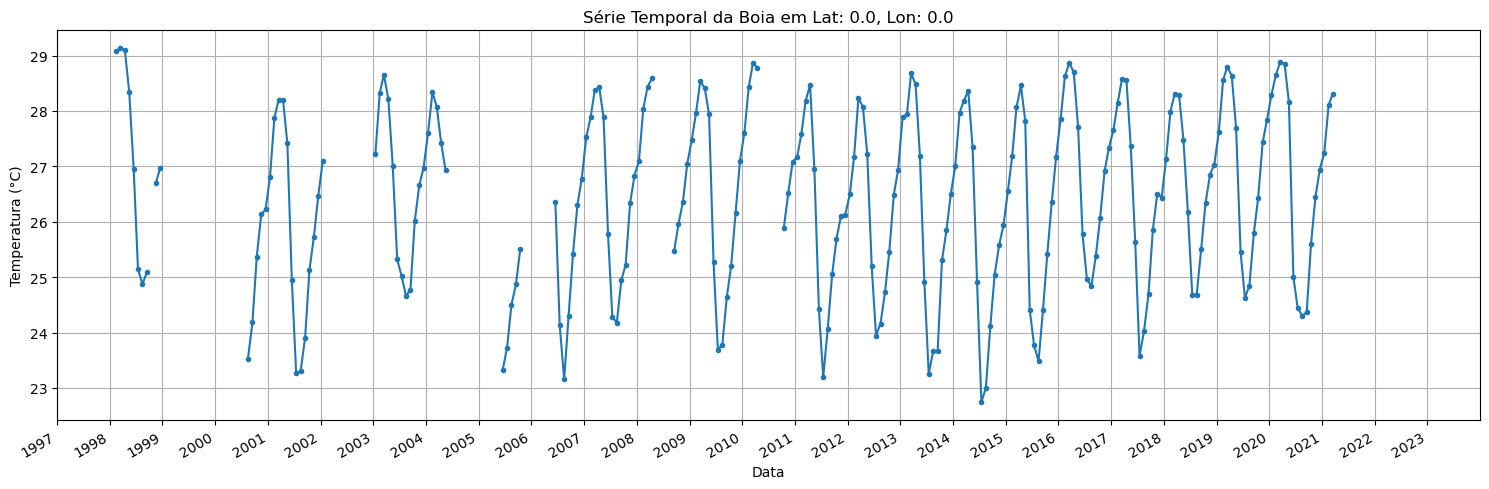

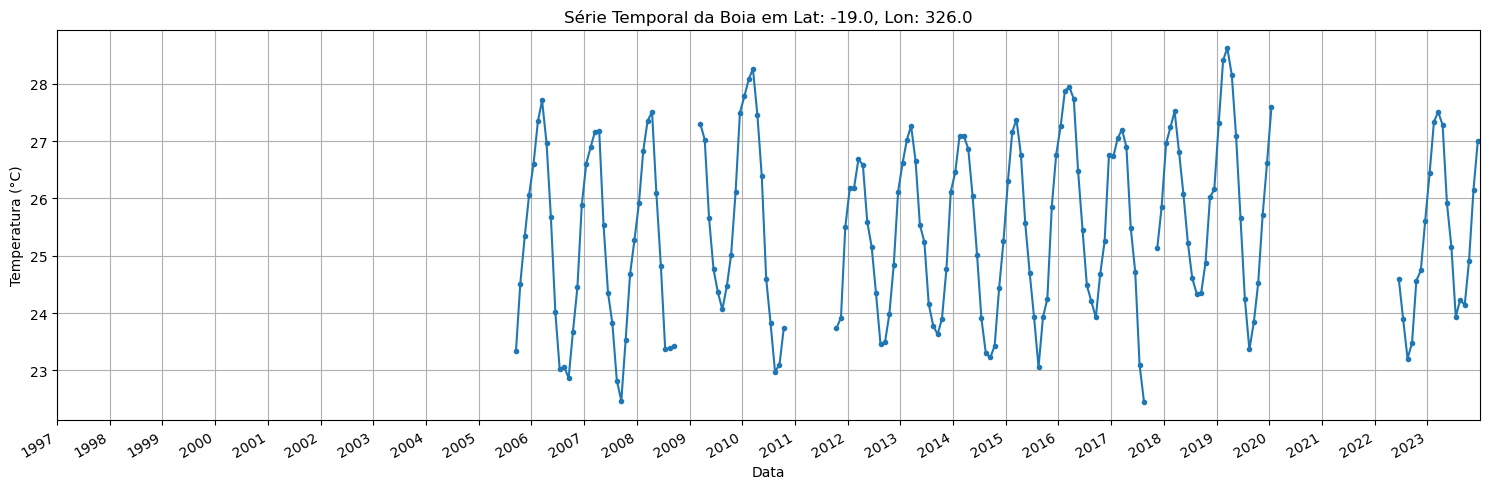

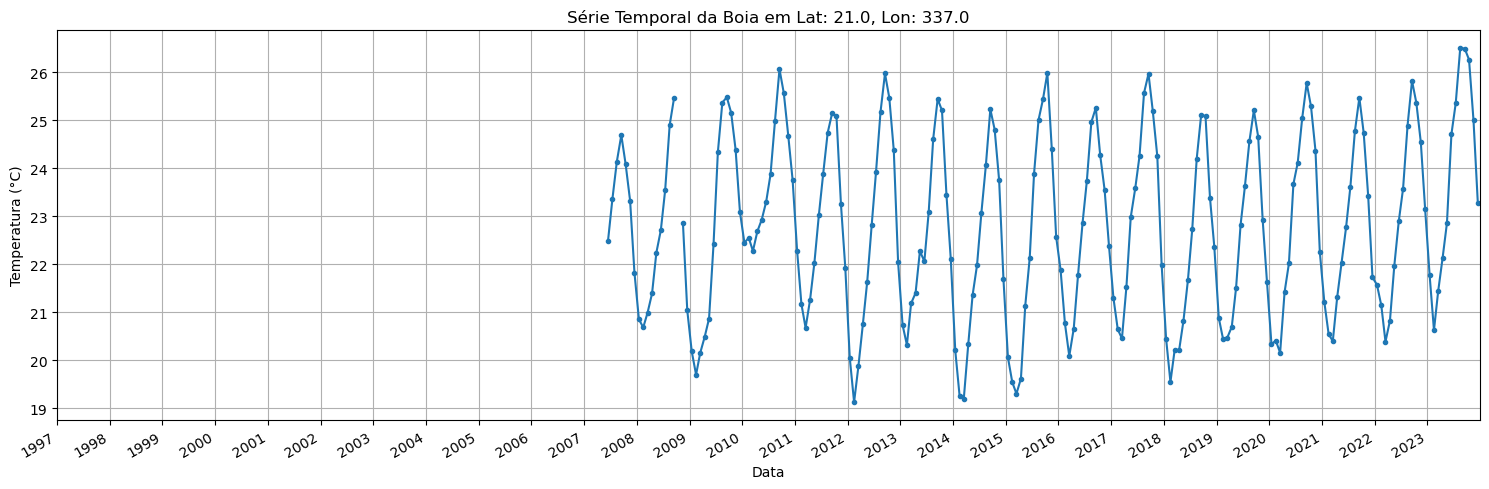

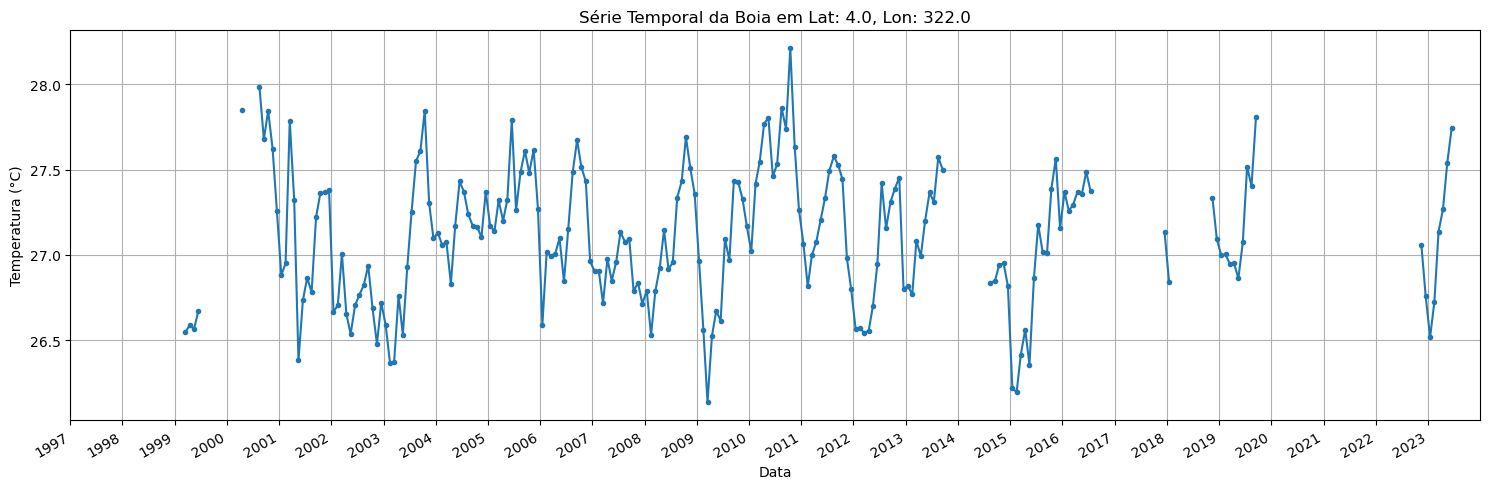

In [19]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates

def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]  # A variável 'time' geralmente está em dias desde uma data base
    temperatura = ds.variables['AT_21'][:]
    
    fill_value = 1e35  
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze() 

    # Converte o tempo de unidades relativas (dias desde uma data) para objetos datetime
    datas = nc.num2date(tempo, units=ds.variables['time'].units)

    return lat, lon, datas, temperatura

caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/AirT/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

def plotar_serie_temporal(datas, temperatura, titulo):
    plt.figure(figsize=(15,5))  # Ajuste o tamanho conforme necessário

    # Converte objetos 'cftime.DatetimeGregorian' para 'datetime.datetime'
    datas_convertidas = [datetime.datetime(date.year, date.month, date.day) for date in datas]
    datas_num = mdates.date2num(datas_convertidas)  # Converte para o formato numérico do Matplotlib

    temperatura = np.array(temperatura)
    
    plt.plot(datas_num, temperatura, '-o', markersize=3)
    plt.title(titulo)
    plt.xlabel('Data')
    plt.ylabel('Temperatura (°C)')
    plt.grid(True)
    
    # Define os limites do eixo x para o intervalo de interesse
    plt.xlim([mdates.date2num(datetime.datetime(1997, 1, 1)), mdates.date2num(datetime.datetime(2023, 12, 31))])
    
    # Formatar o eixo x para mostrar apenas o ano
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())

    plt.gcf().autofmt_xdate()  # Rotação automática das datas para melhor visualização
    plt.tight_layout()  # Ajuste automático do layout
    plt.show()

for arquivo in arquivos_netCDF:
    lat, lon, datas, temperatura = ler_dados(arquivo)
    titulo = f"Série Temporal da Boia em Lat: {lat.mean():.1f}, Lon: {lon.mean():.1f}"
    plotar_serie_temporal(datas, temperatura, titulo)


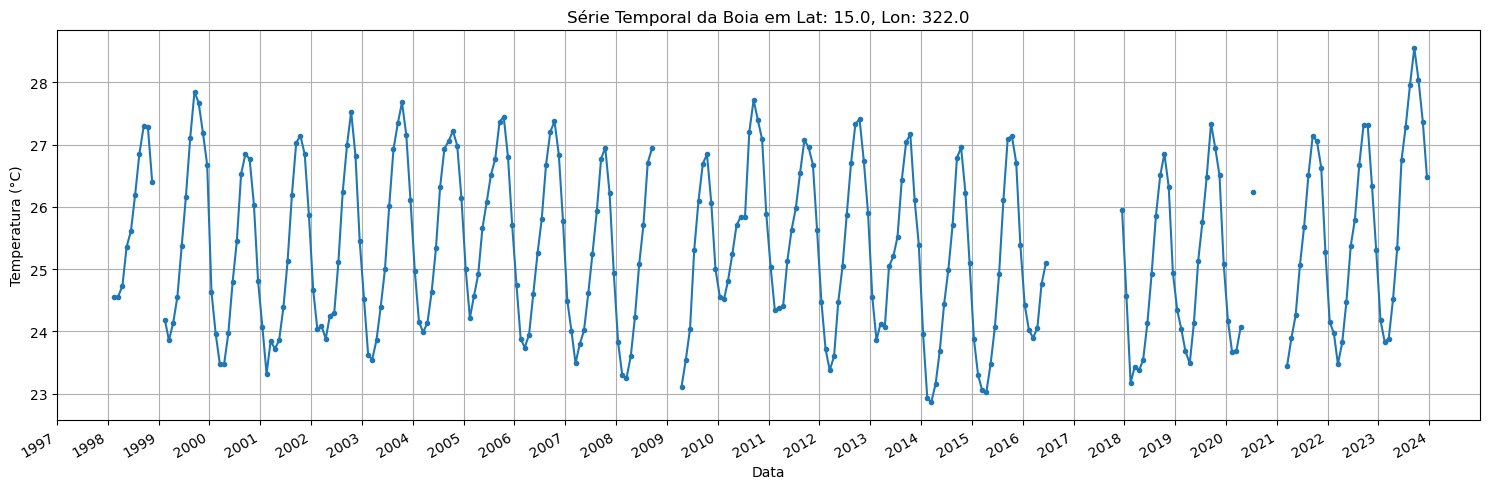

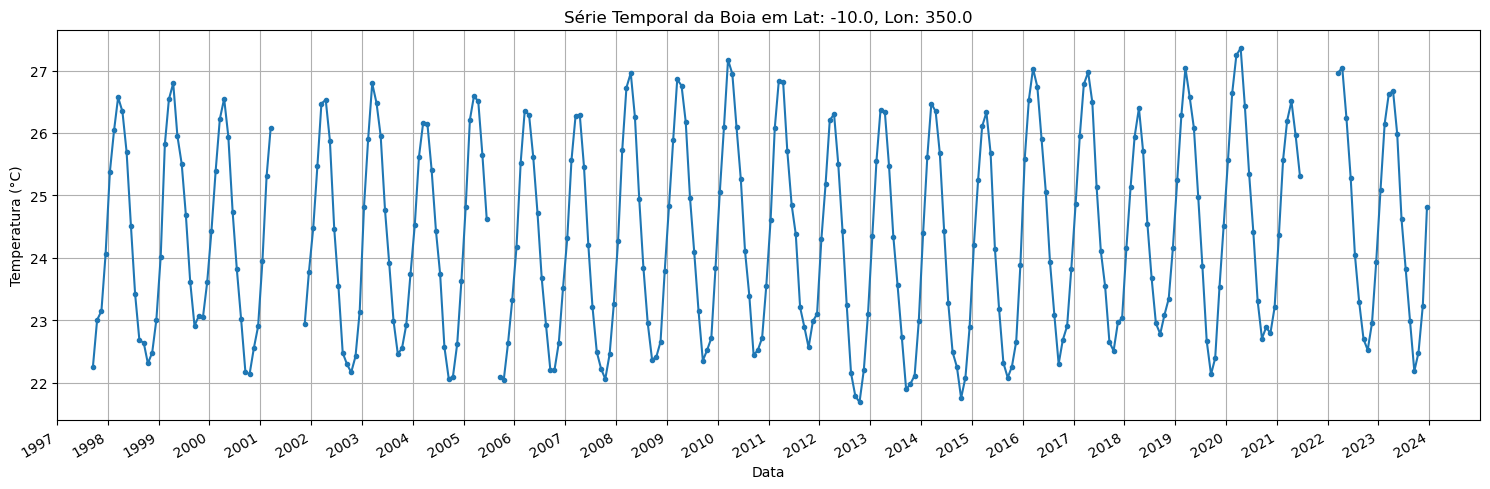

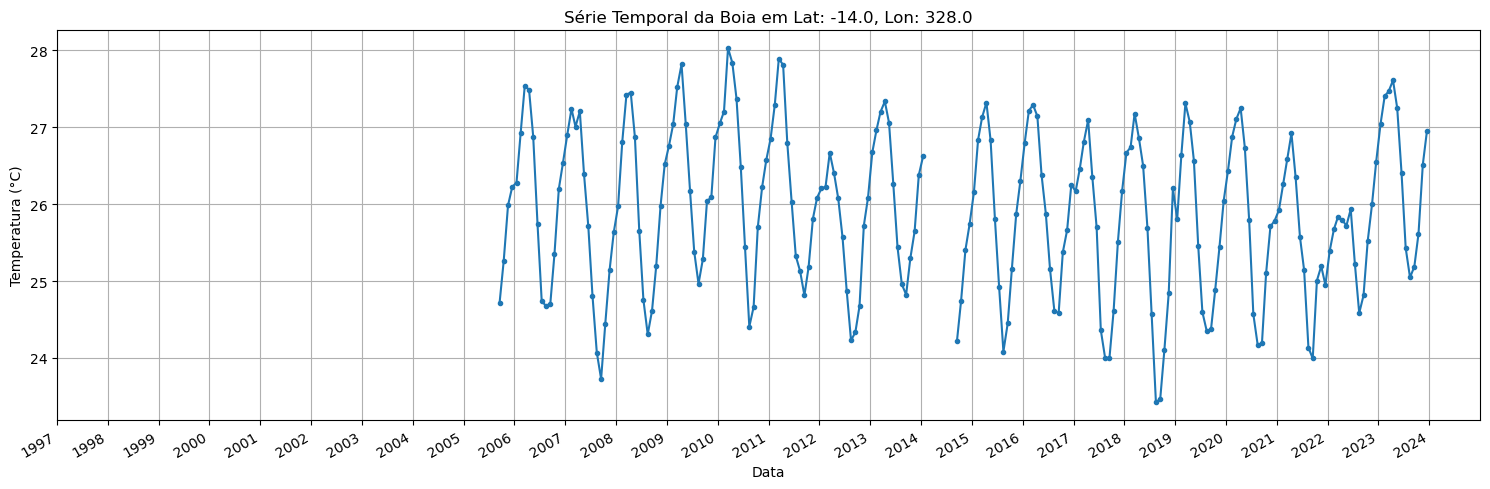

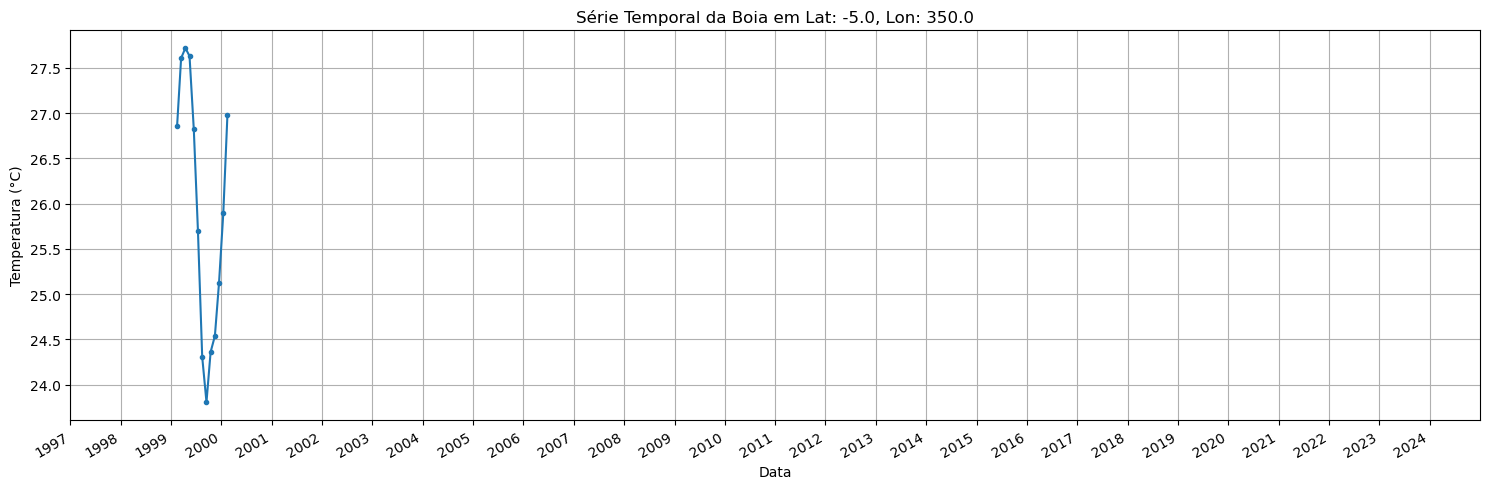

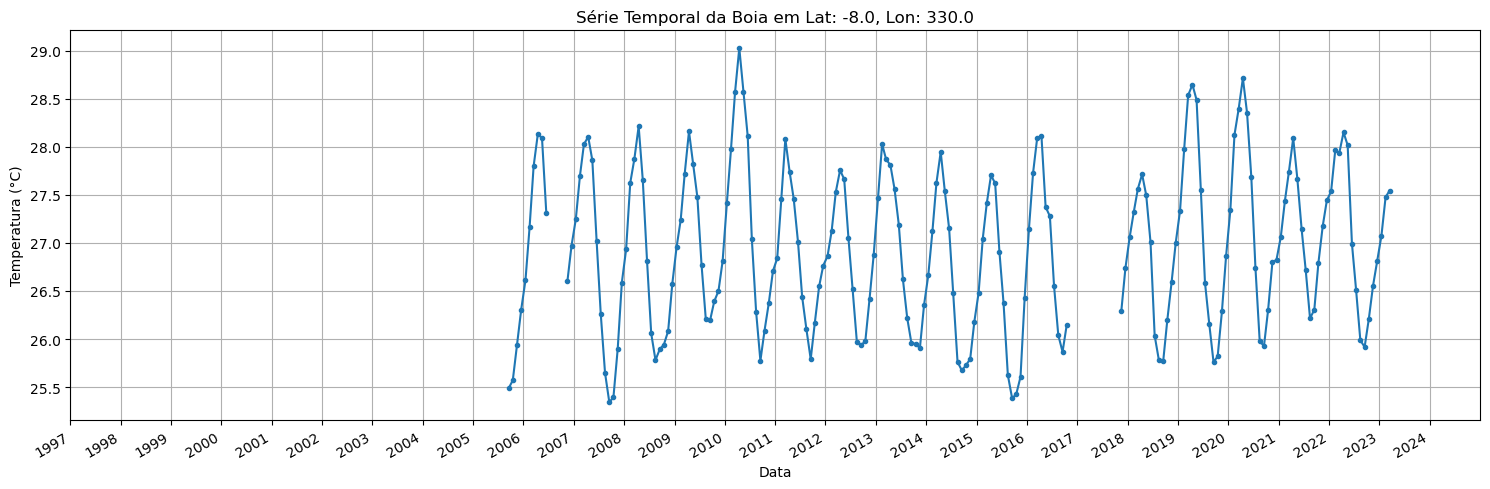

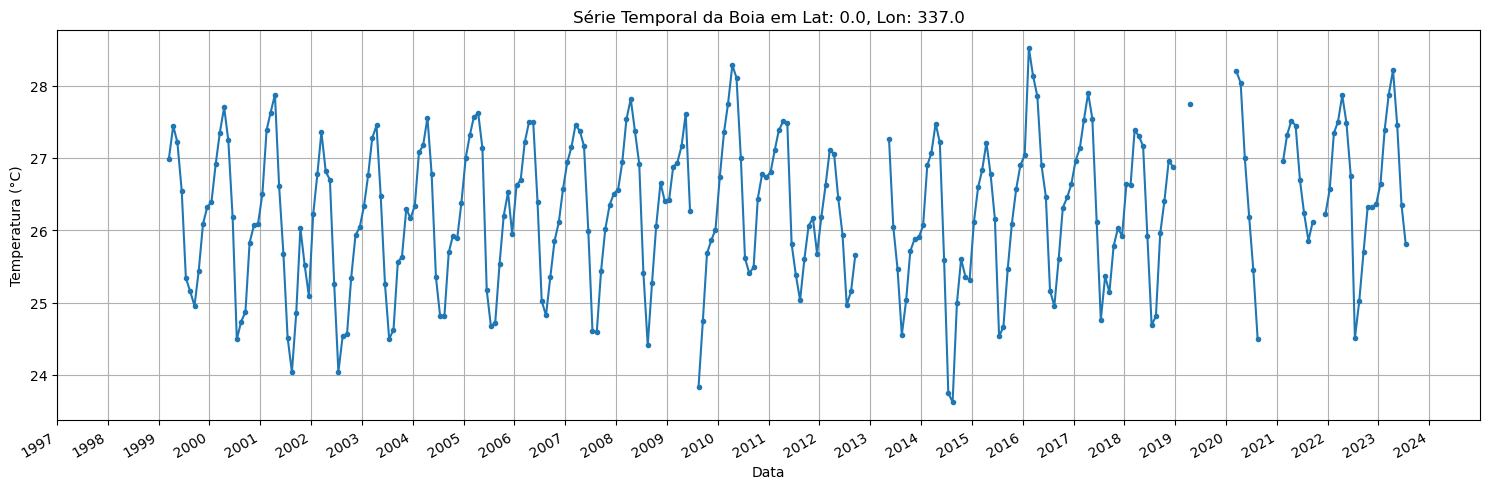

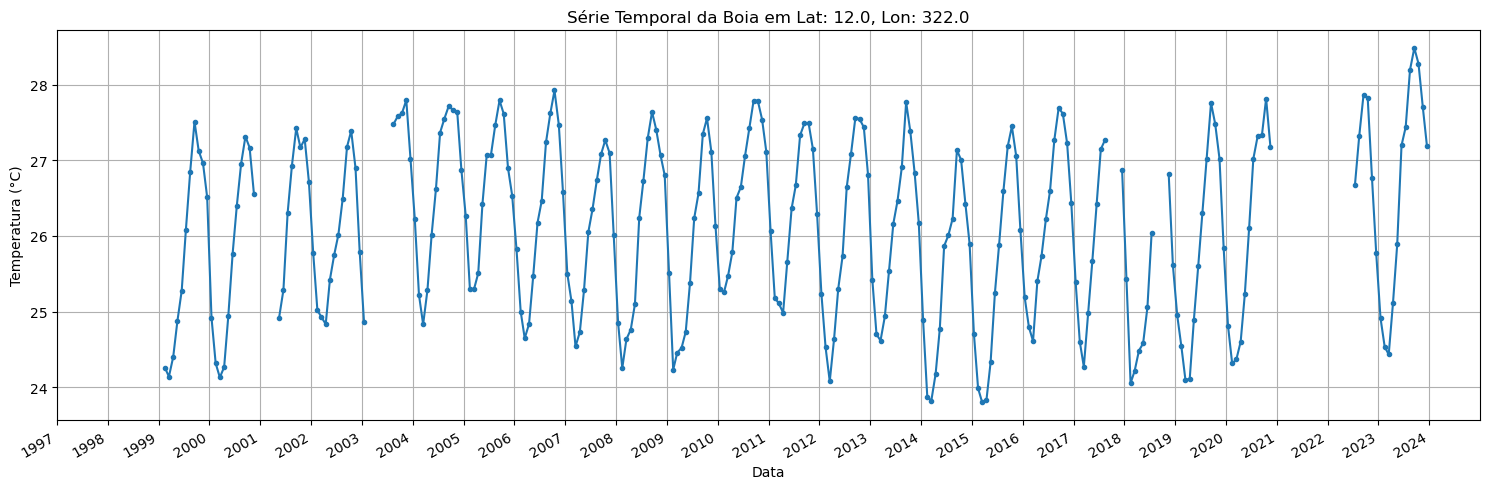

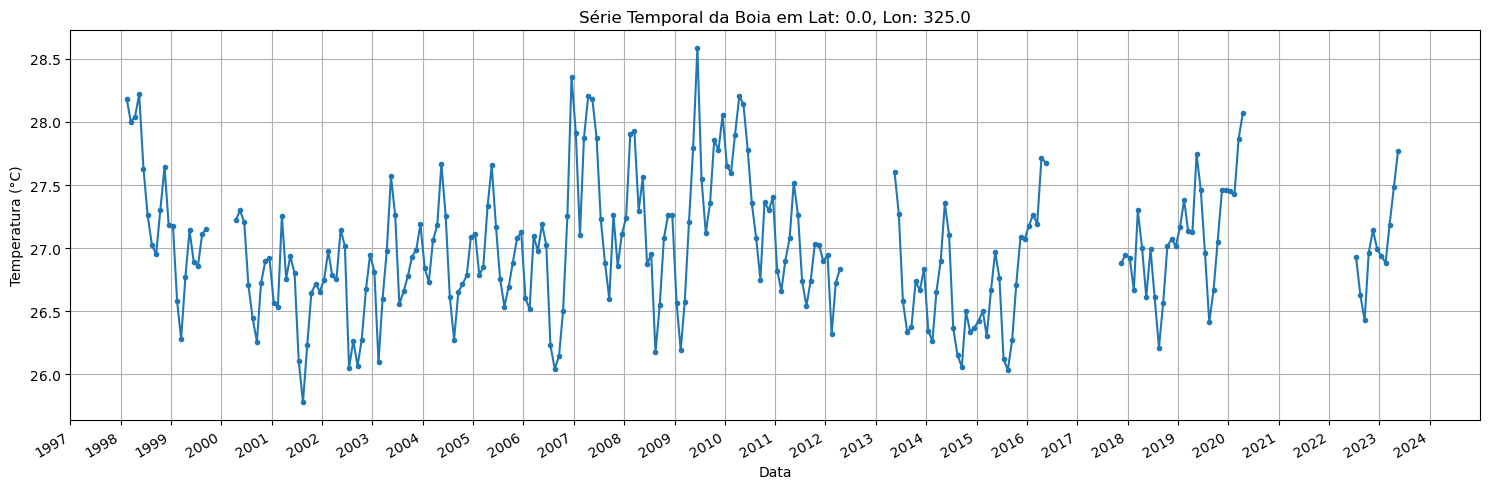

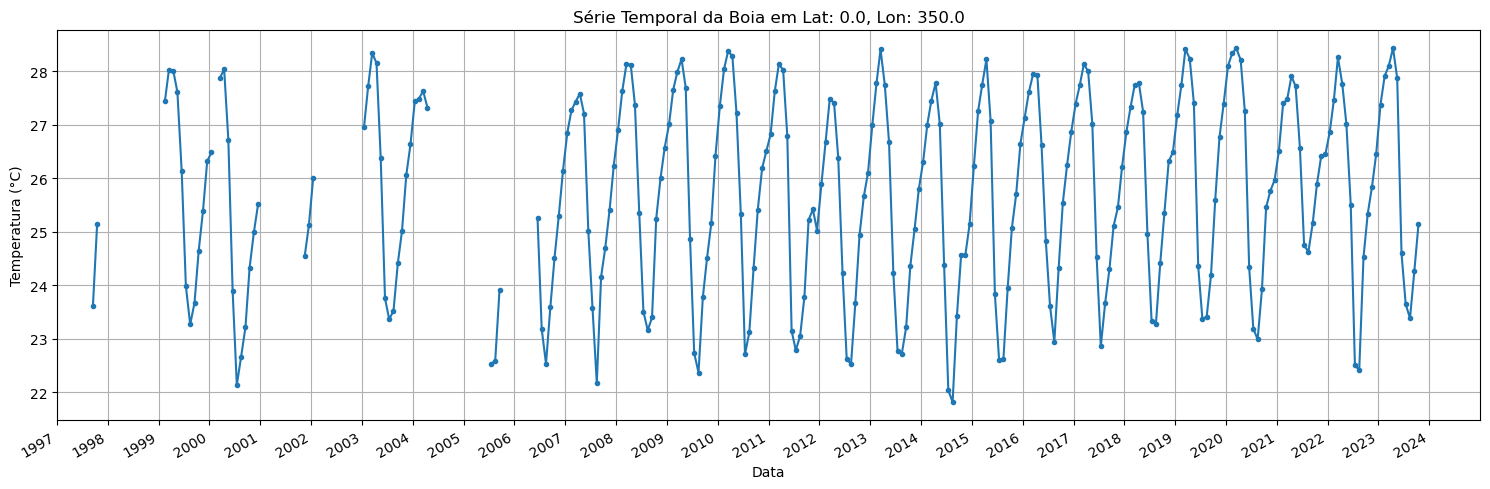

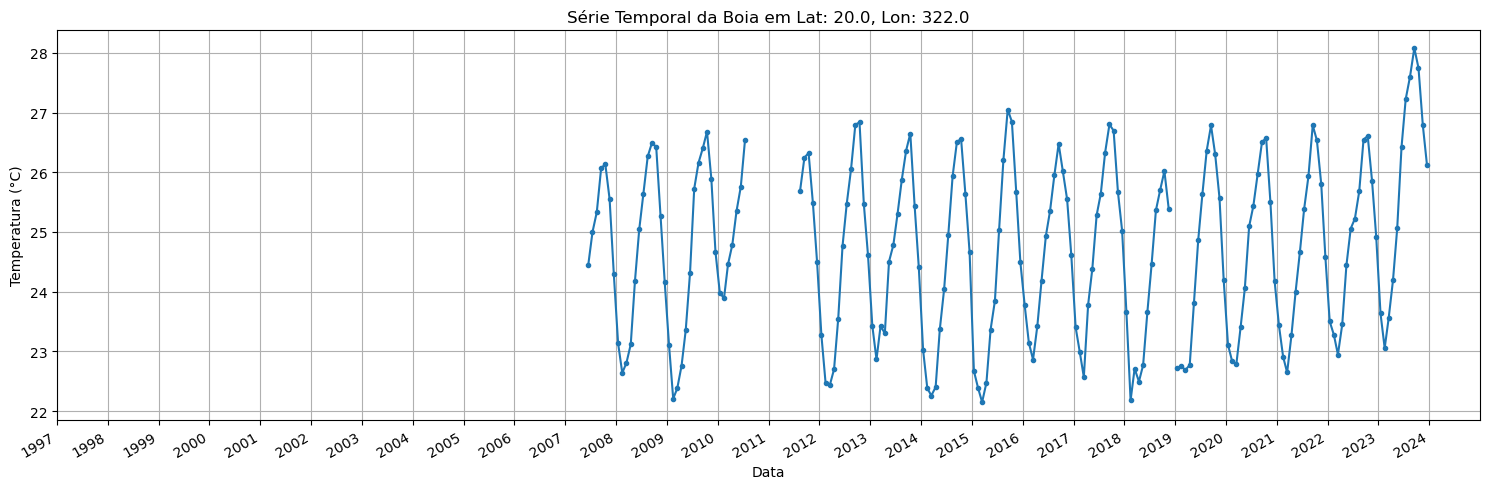

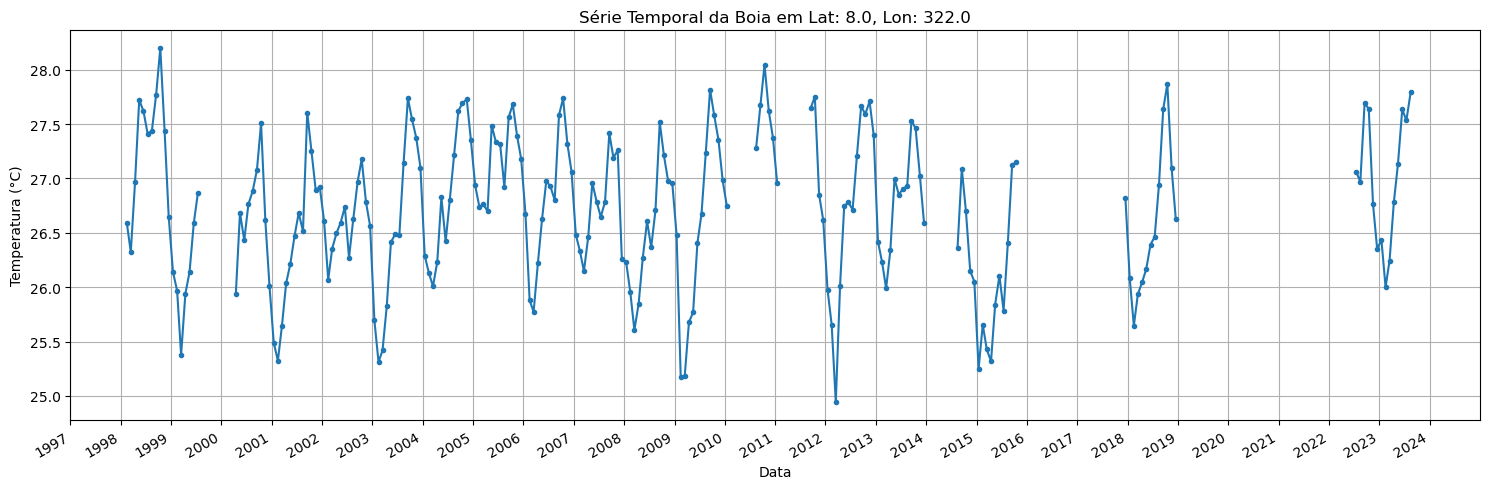

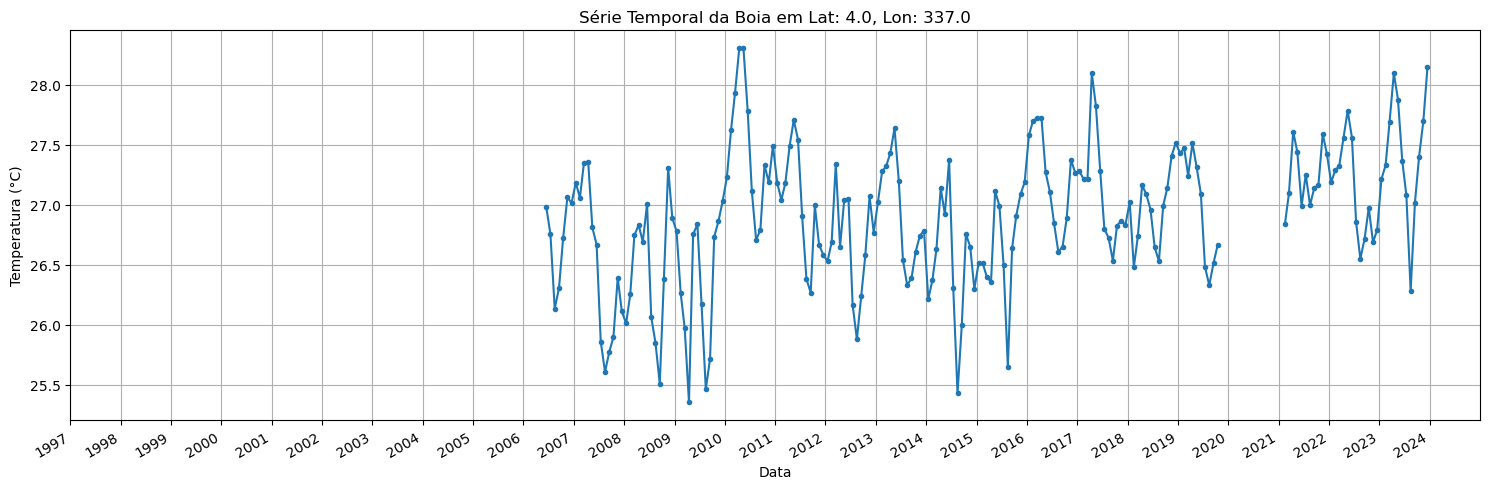

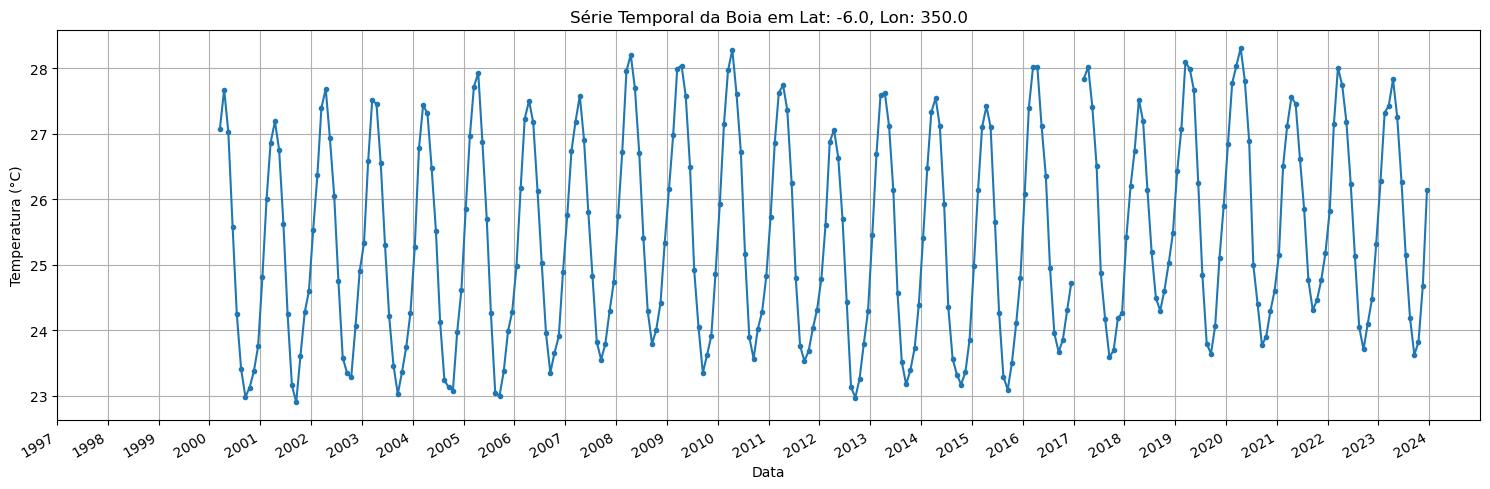

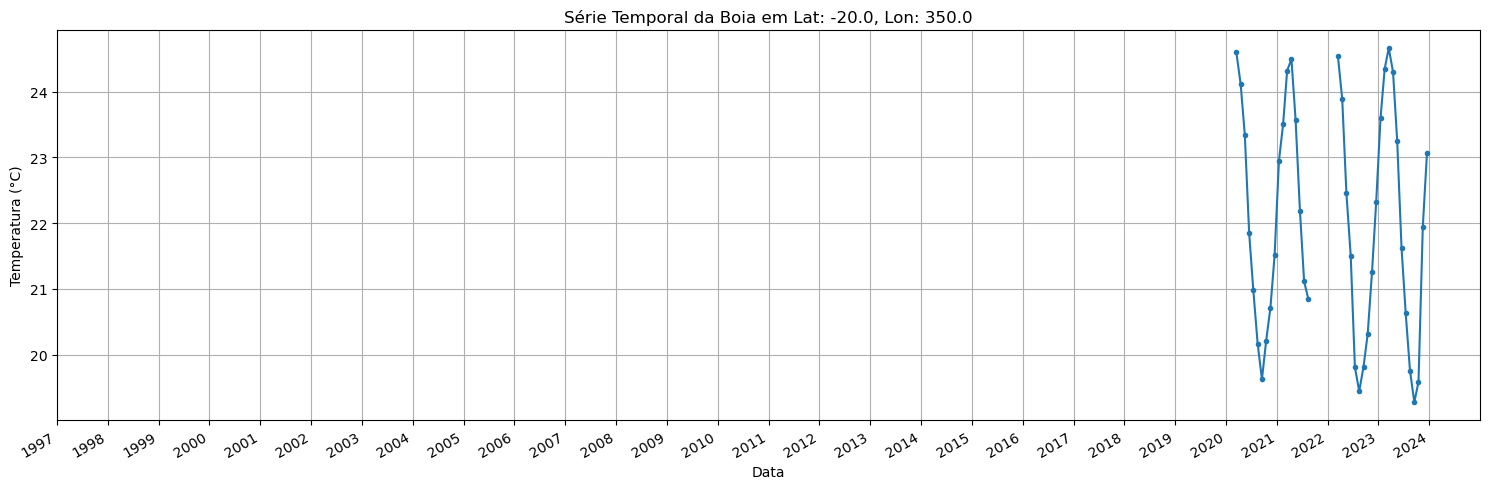

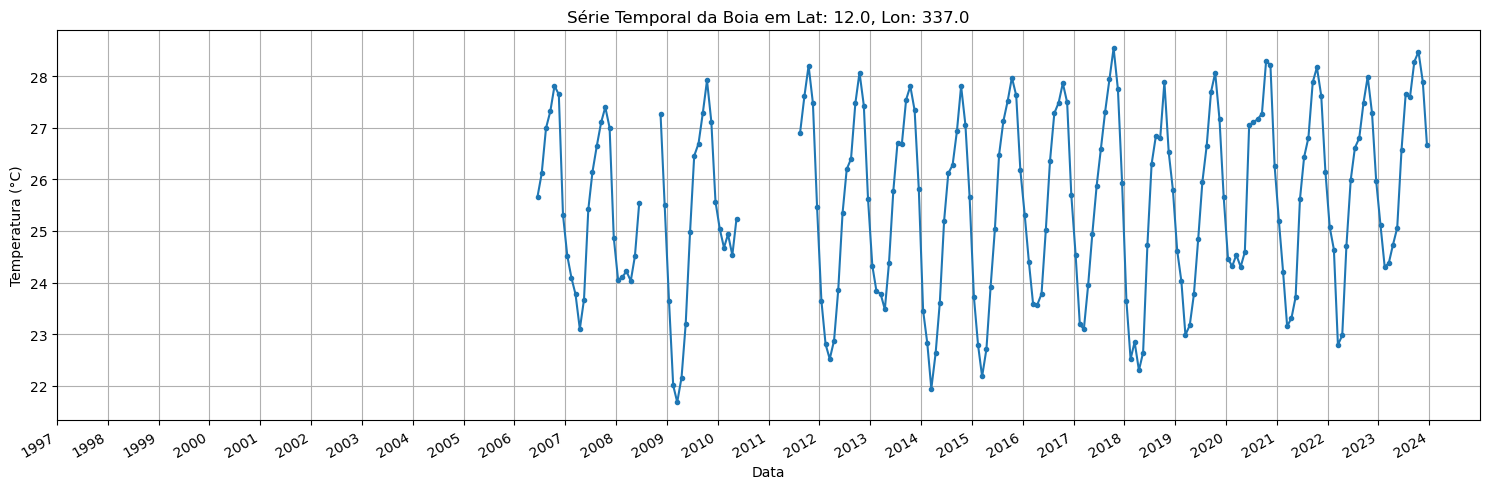

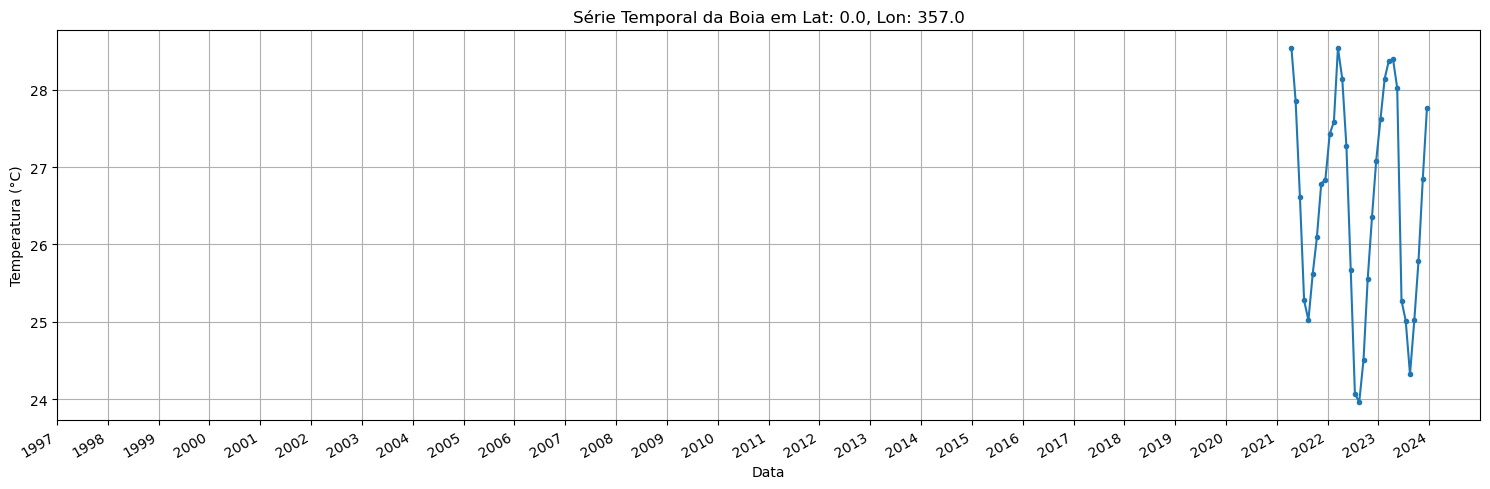

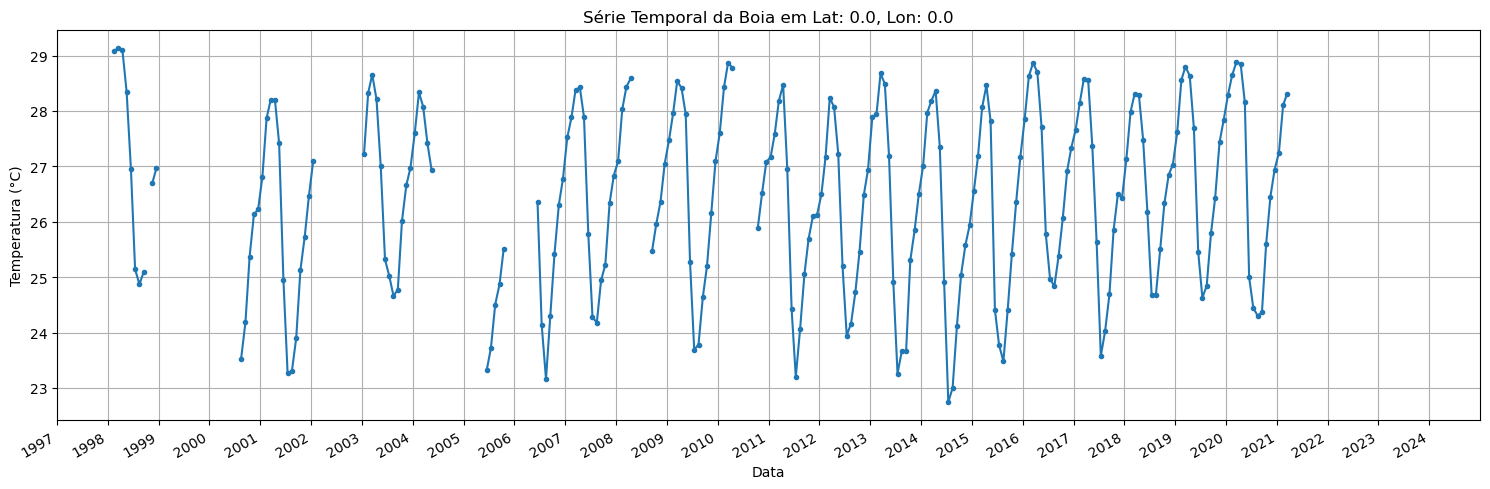

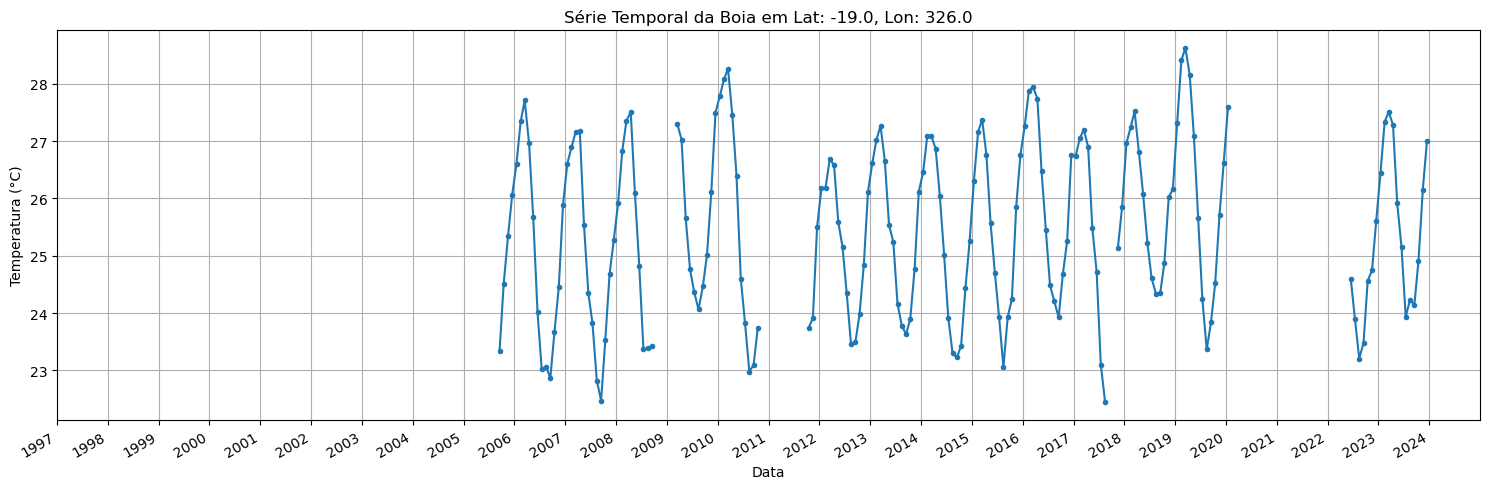

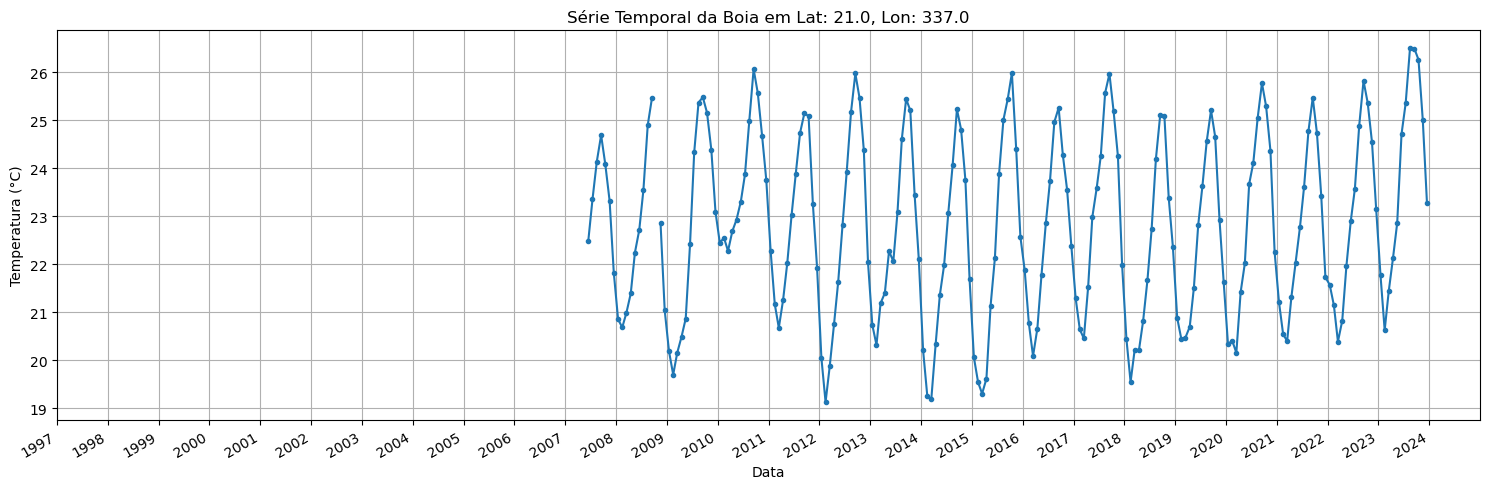

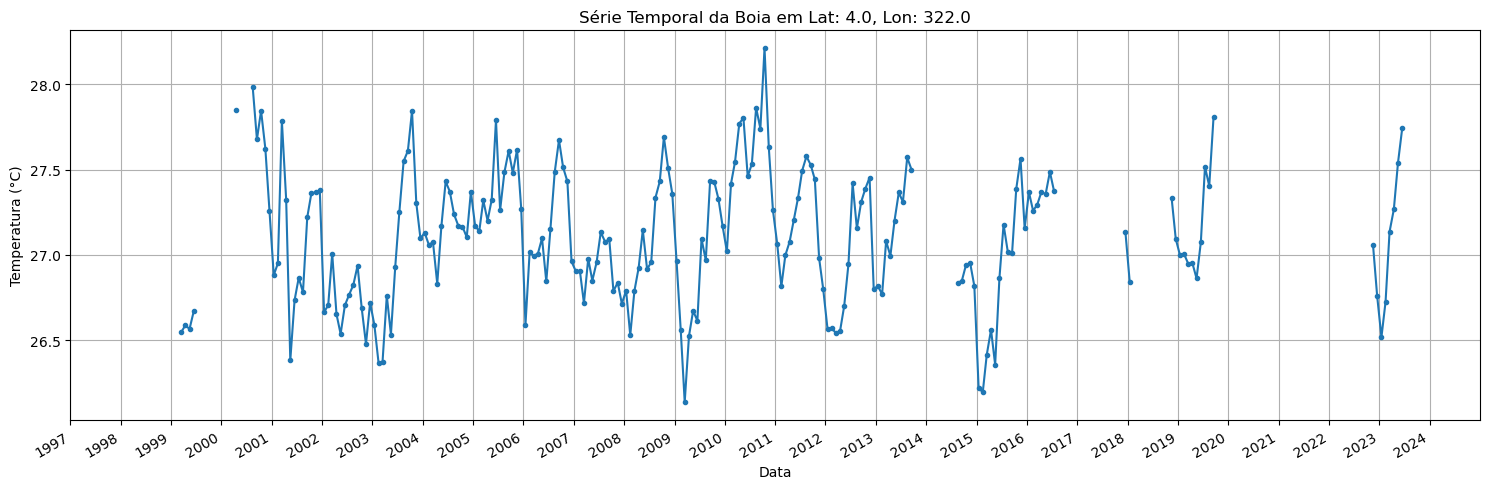

In [44]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]  # A variável 'time' geralmente está em dias desde uma data base
    temperatura = ds.variables['AT_21'][:]
    
    fill_value = 1e35  
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze() 

    # Converte o tempo de unidades relativas (dias desde uma data) para objetos datetime
    datas = nc.num2date(tempo, units=ds.variables['time'].units)

    return lat, lon, datas, temperatura

caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/AirT/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

def plotar_serie_temporal(datas, temperatura, titulo):
    plt.figure(figsize=(15,5))  # Ajuste o tamanho conforme necessário

    # Converte objetos 'cftime.DatetimeGregorian' para 'datetime.datetime'
    datas_convertidas = [datetime.datetime(date.year, date.month, date.day) for date in datas]
    datas_num = mdates.date2num(datas_convertidas)  # Converte para o formato numérico do Matplotlib

    temperatura = np.array(temperatura)
    
    plt.plot(datas_num, temperatura, '-o', markersize=3)
    plt.title(titulo)
    plt.xlabel('Data')
    plt.ylabel('Temperatura (°C)')
    plt.grid(True)
    
    # Define os limites do eixo x para o intervalo de interesse
    plt.xlim([mdates.date2num(datetime.datetime(1997, 1, 1)), mdates.date2num(datetime.datetime(2024, 12, 31))])
    
    # Formatar o eixo x para mostrar apenas o ano
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())

    plt.gcf().autofmt_xdate()  # Rotação automática das datas para melhor visualização
    plt.tight_layout()  # Ajuste automático do layout
    plt.show()

for arquivo in arquivos_netCDF:
    lat, lon, datas, temperatura = ler_dados(arquivo)
    titulo = f"Série Temporal da Boia em Lat: {lat.mean():.1f}, Lon: {lon.mean():.1f}"
    plotar_serie_temporal(datas, temperatura, titulo)


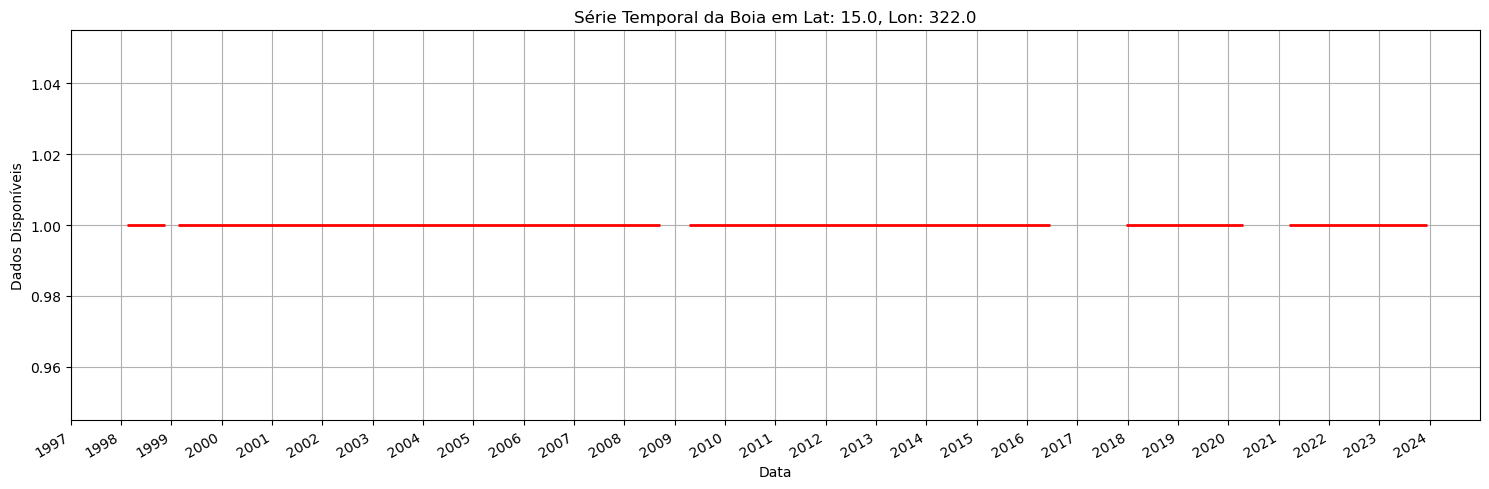

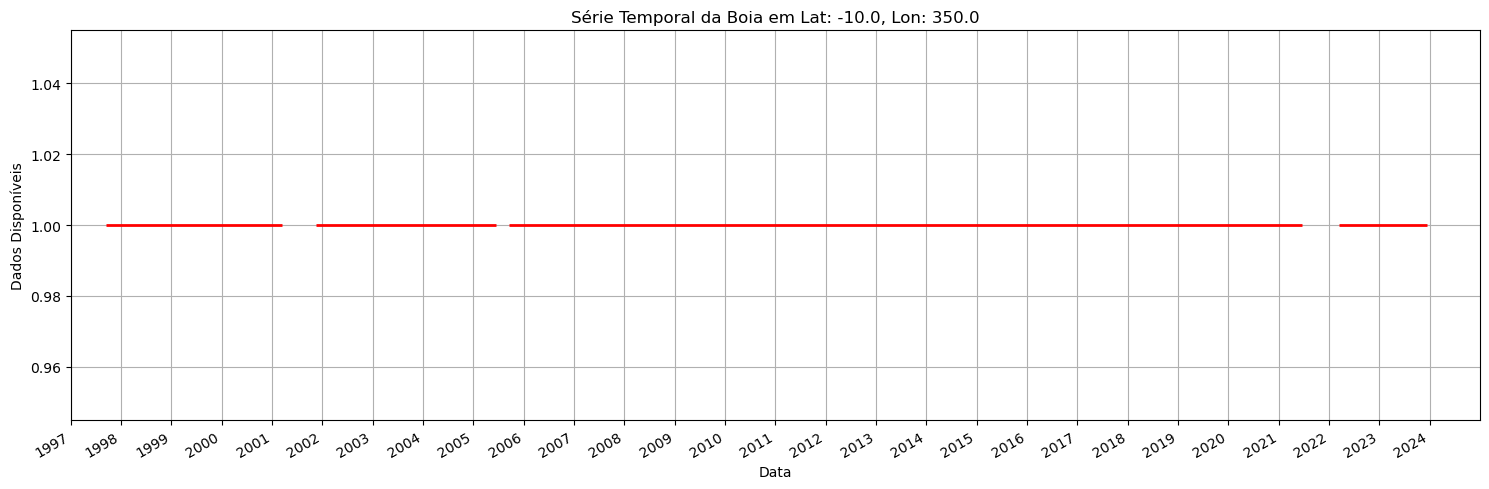

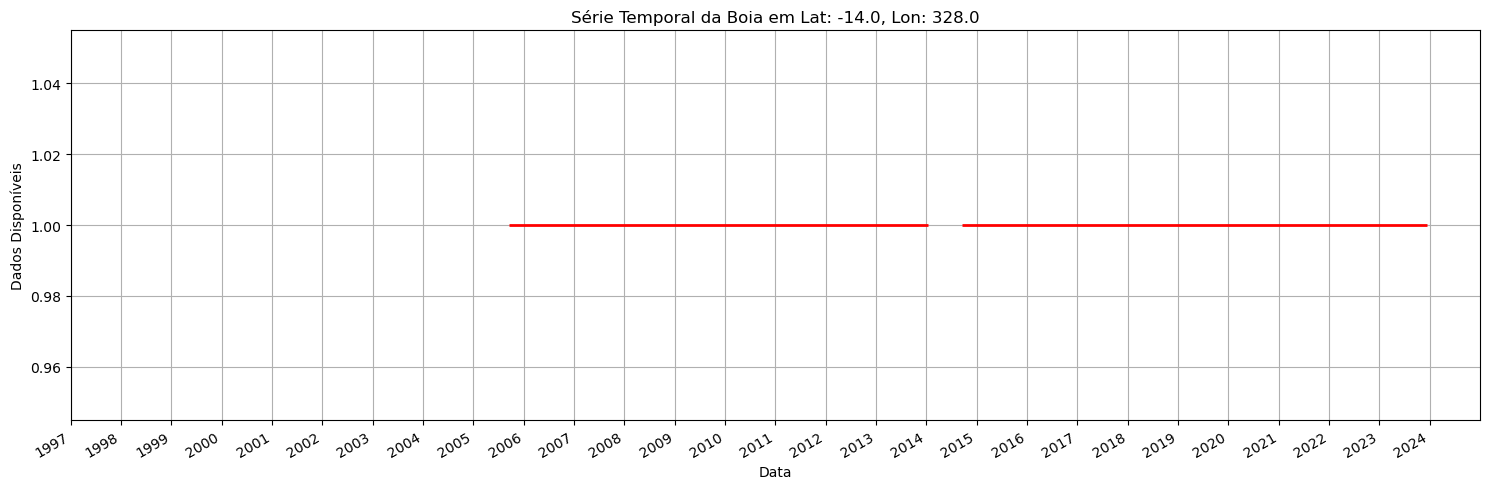

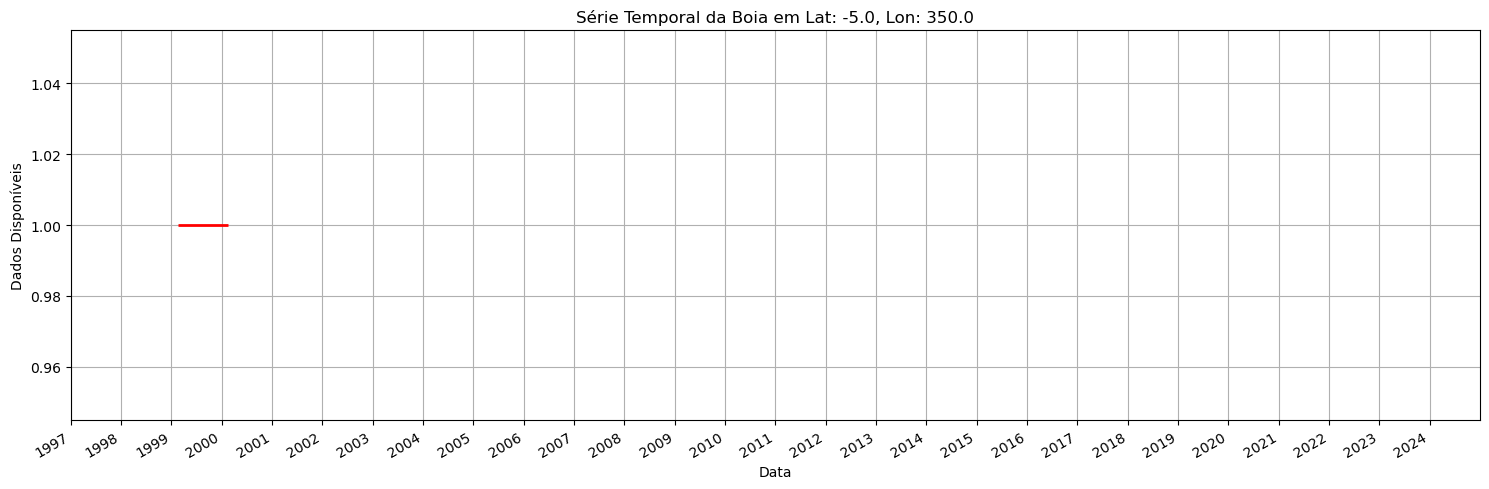

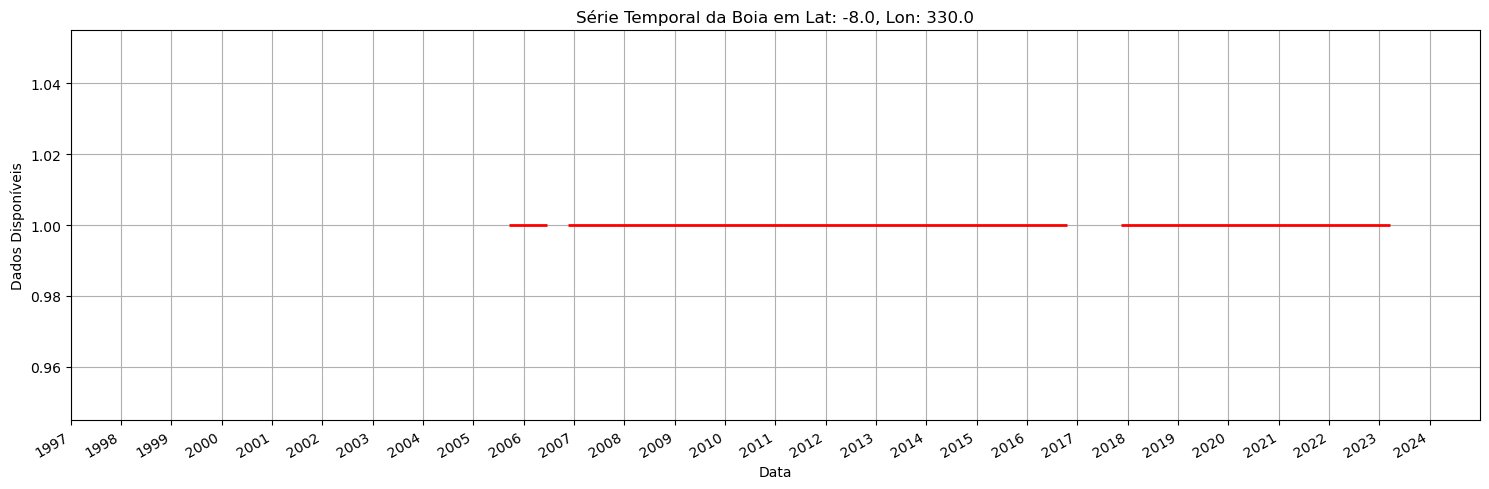

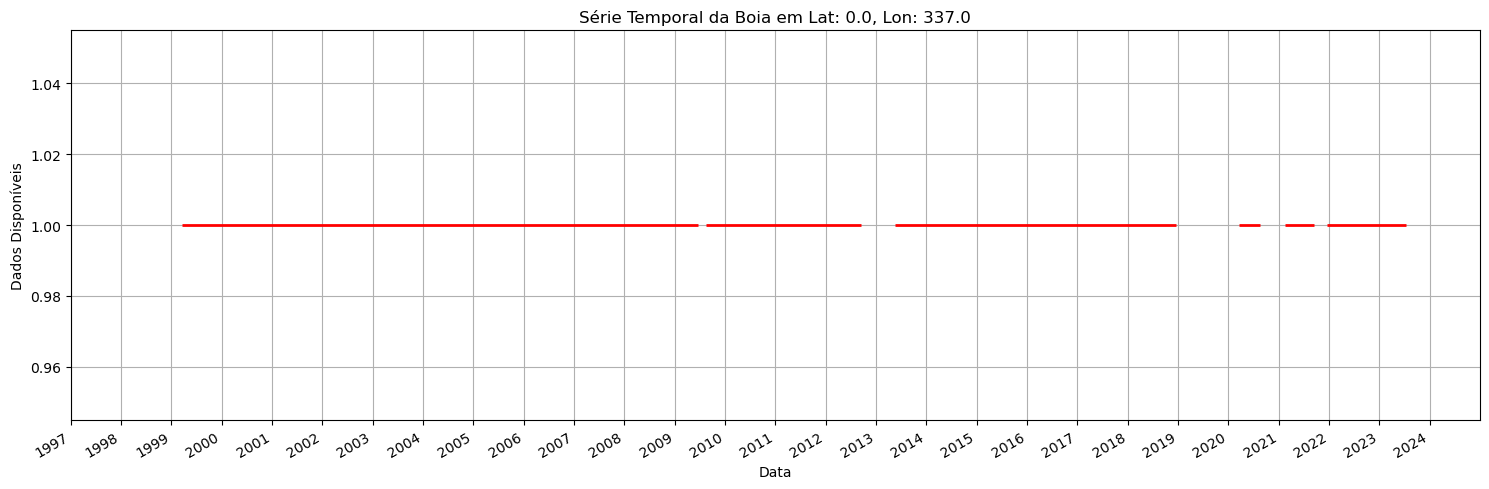

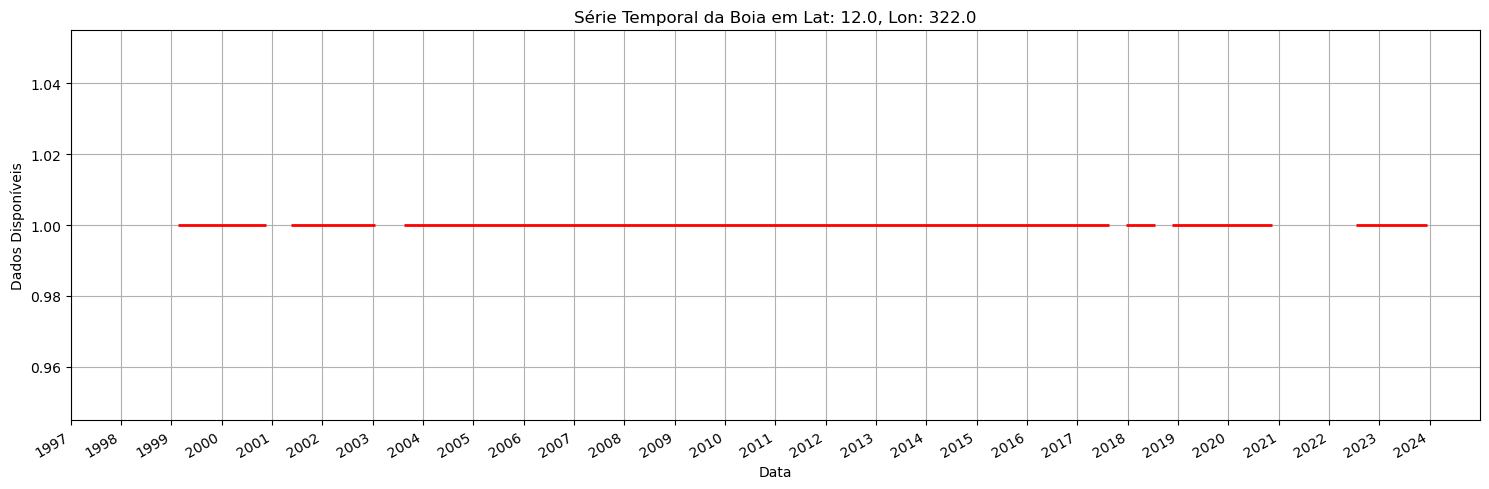

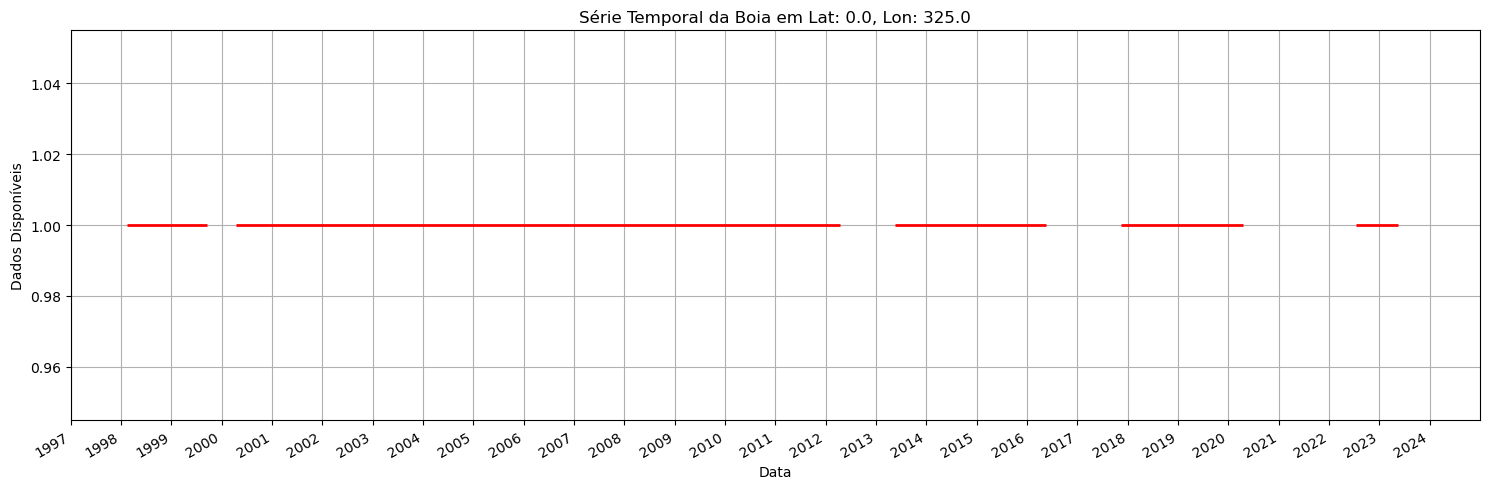

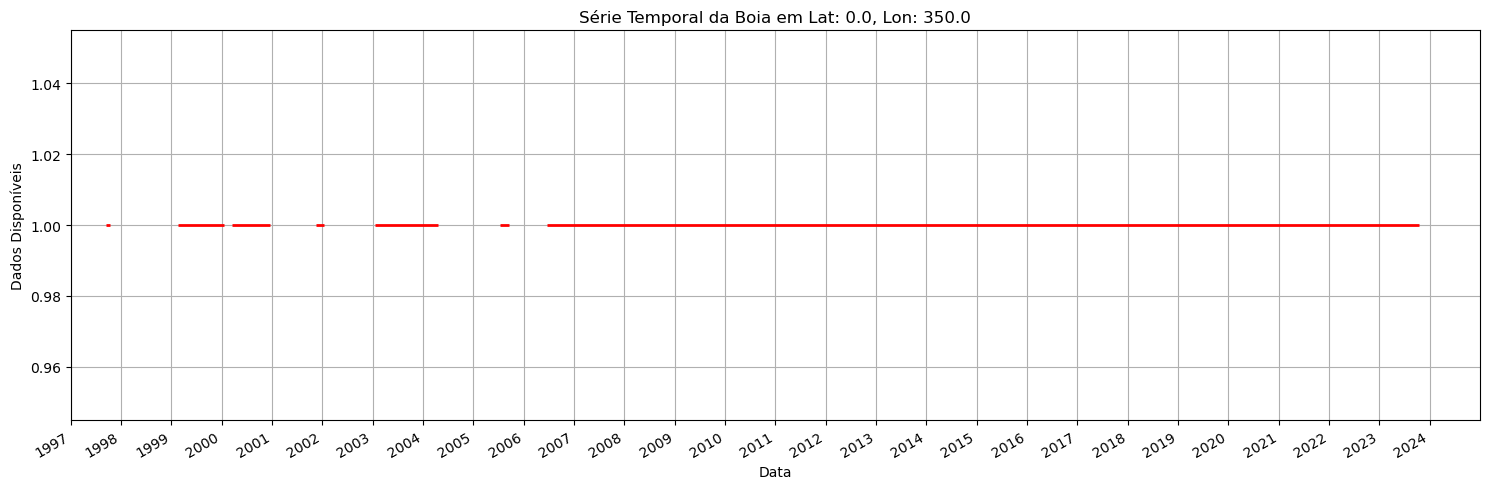

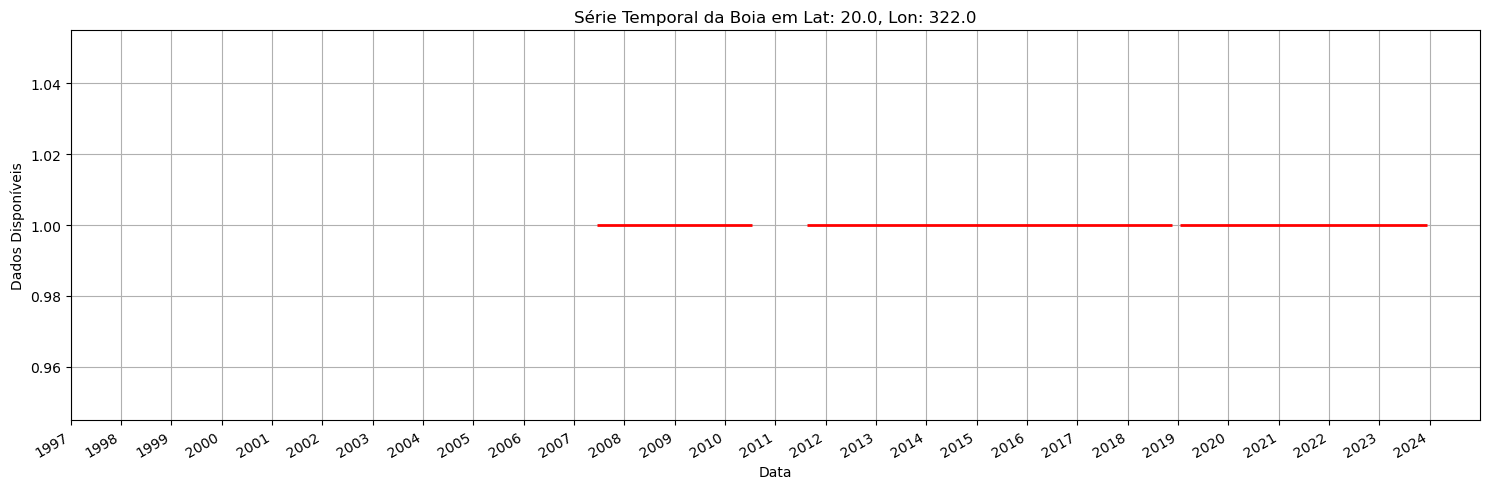

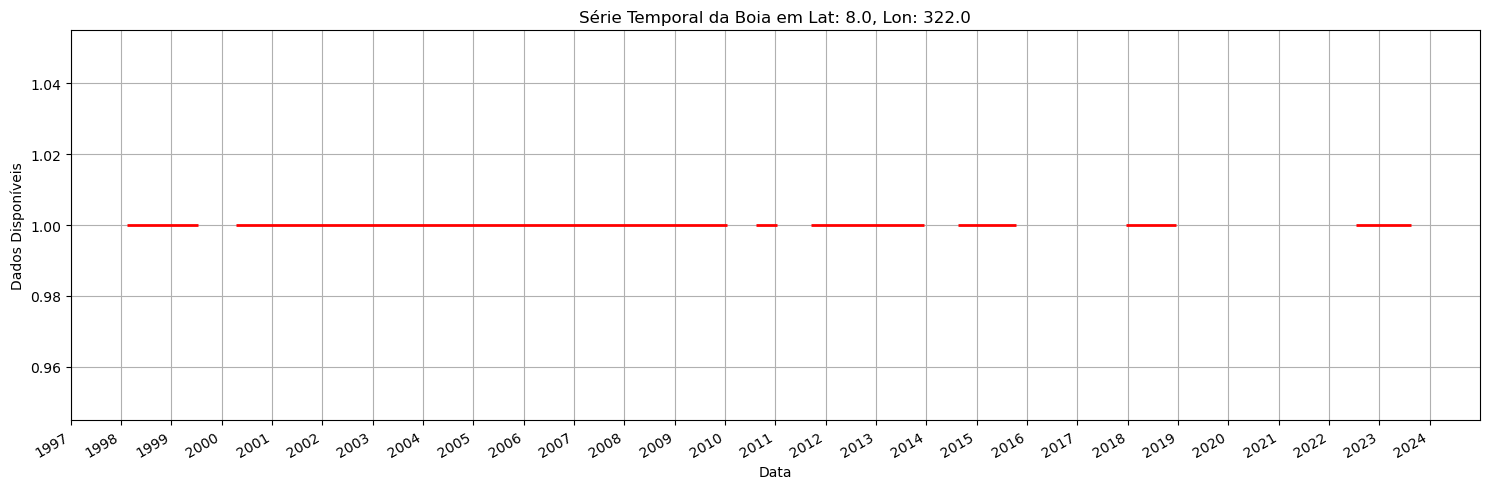

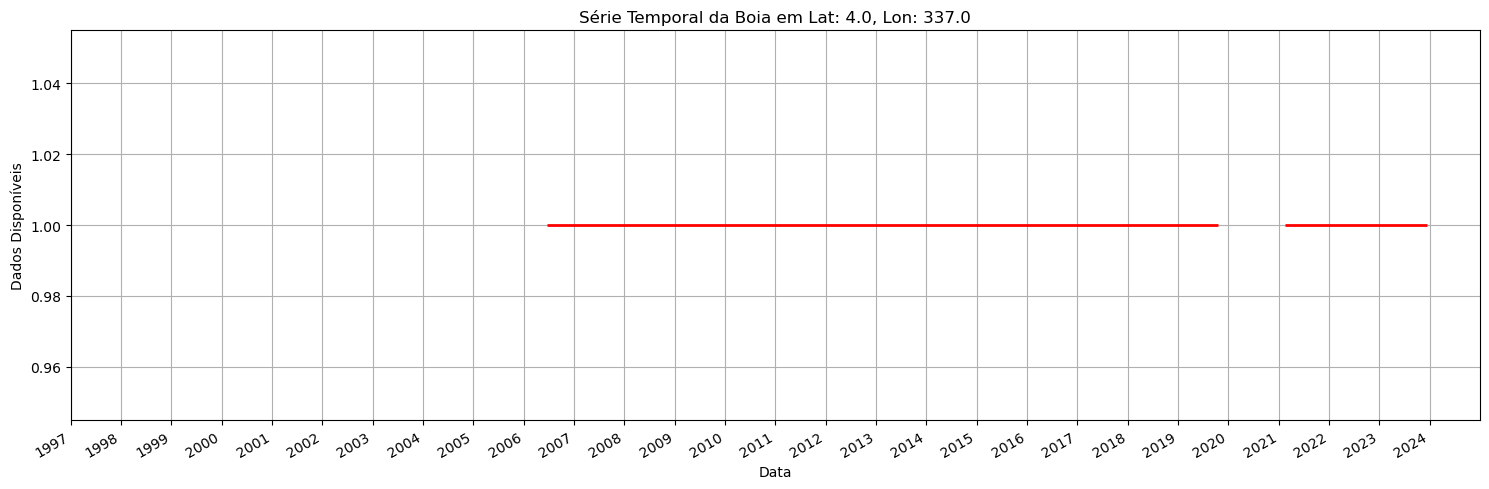

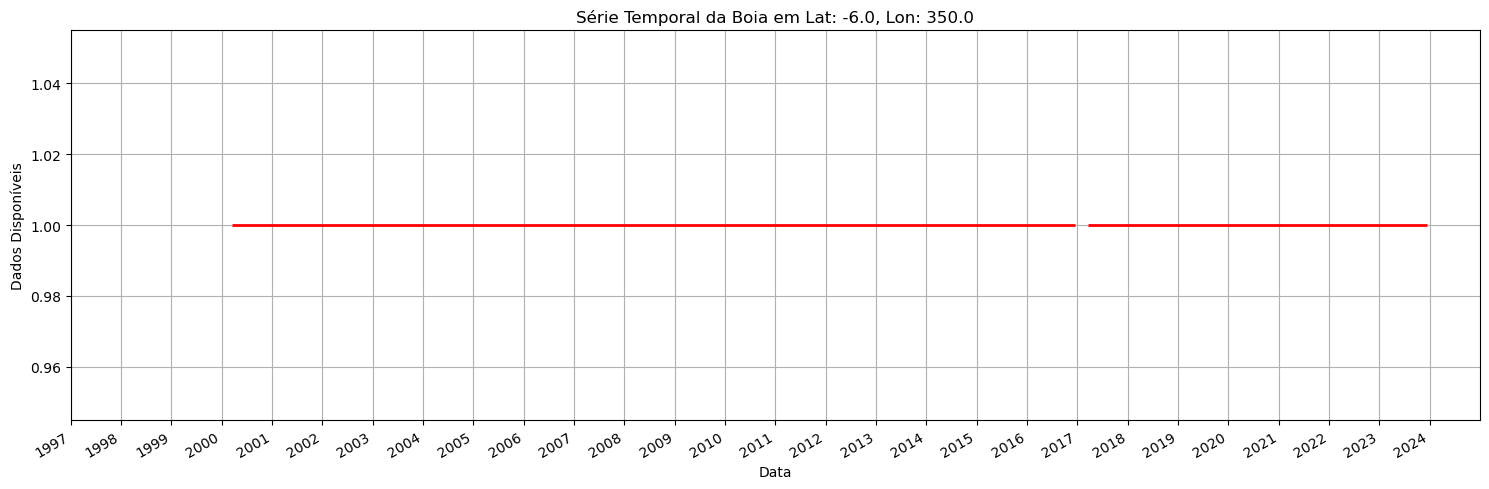

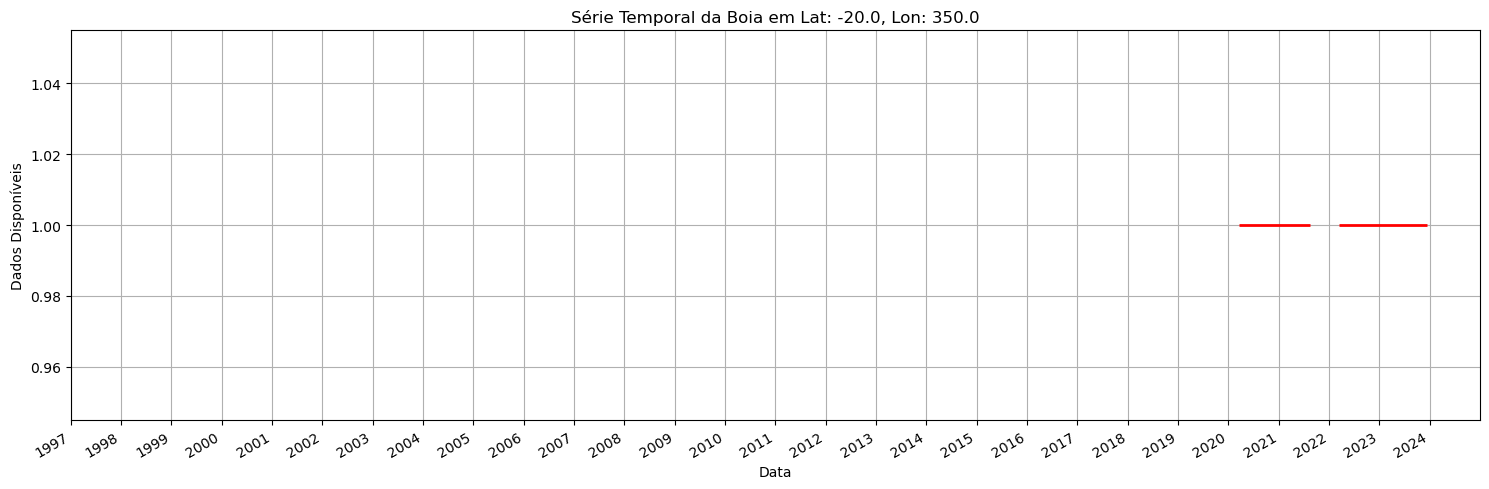

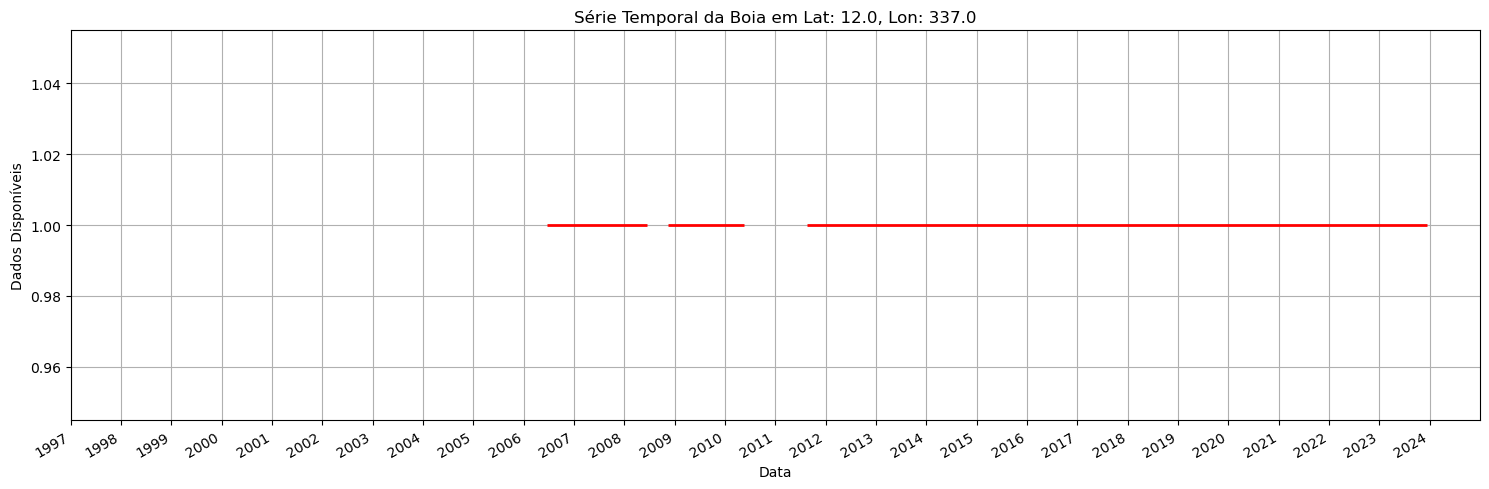

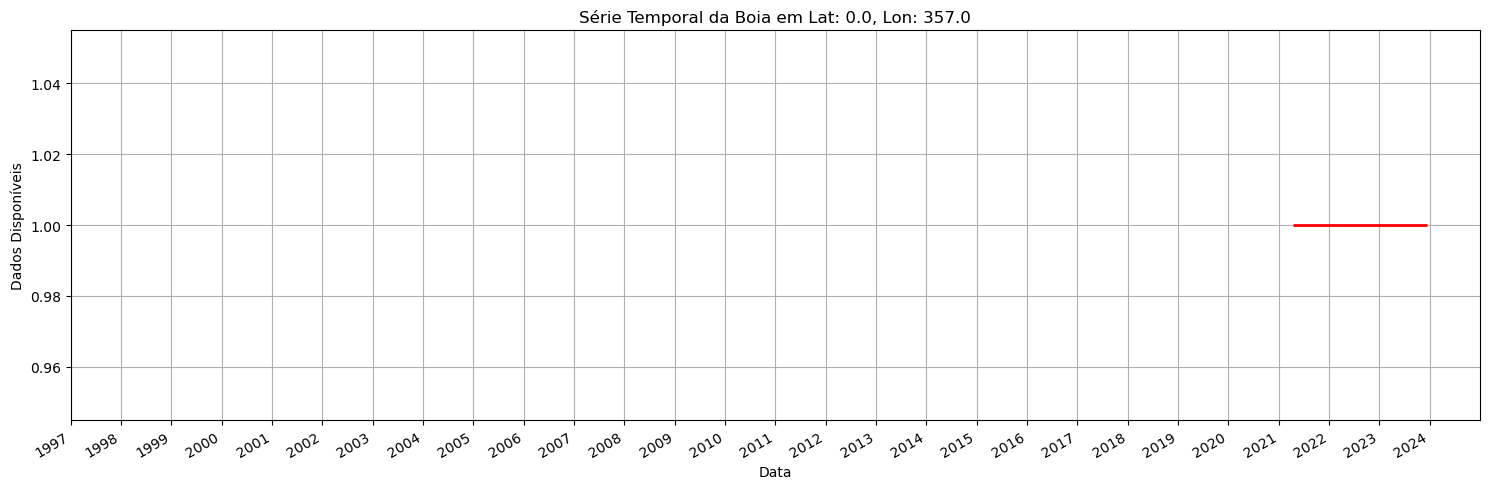

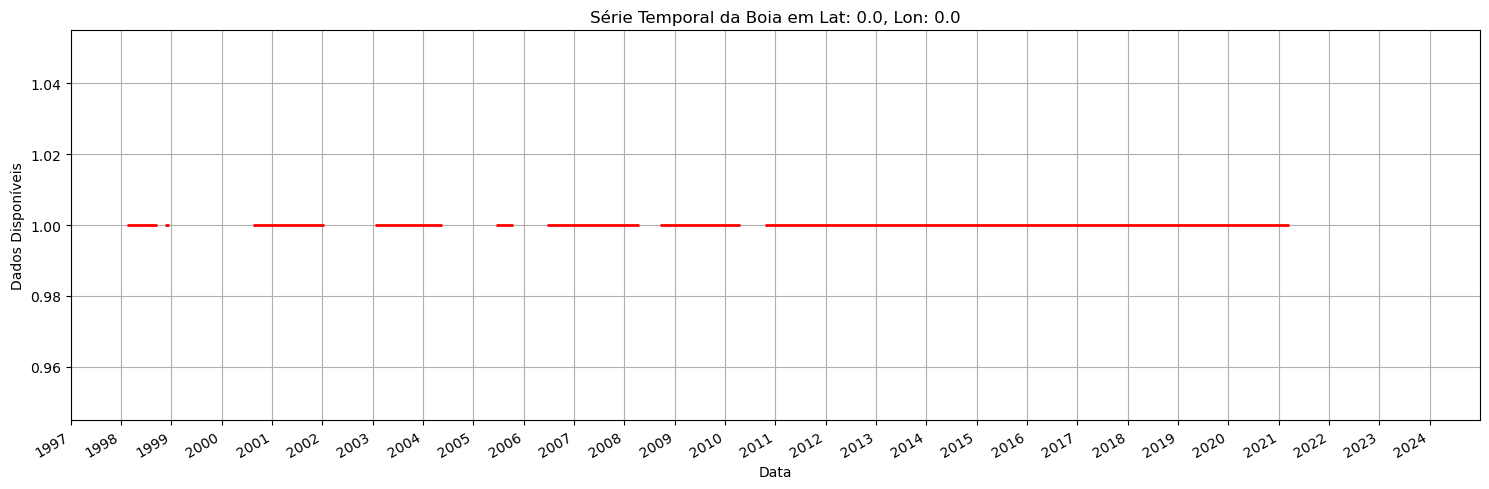

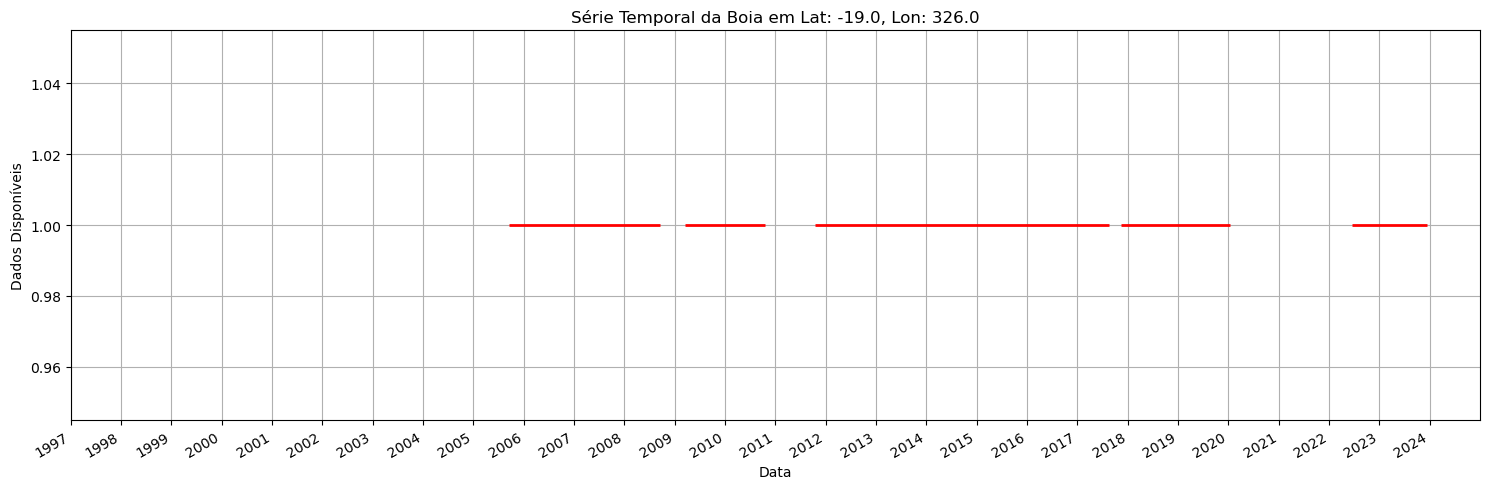

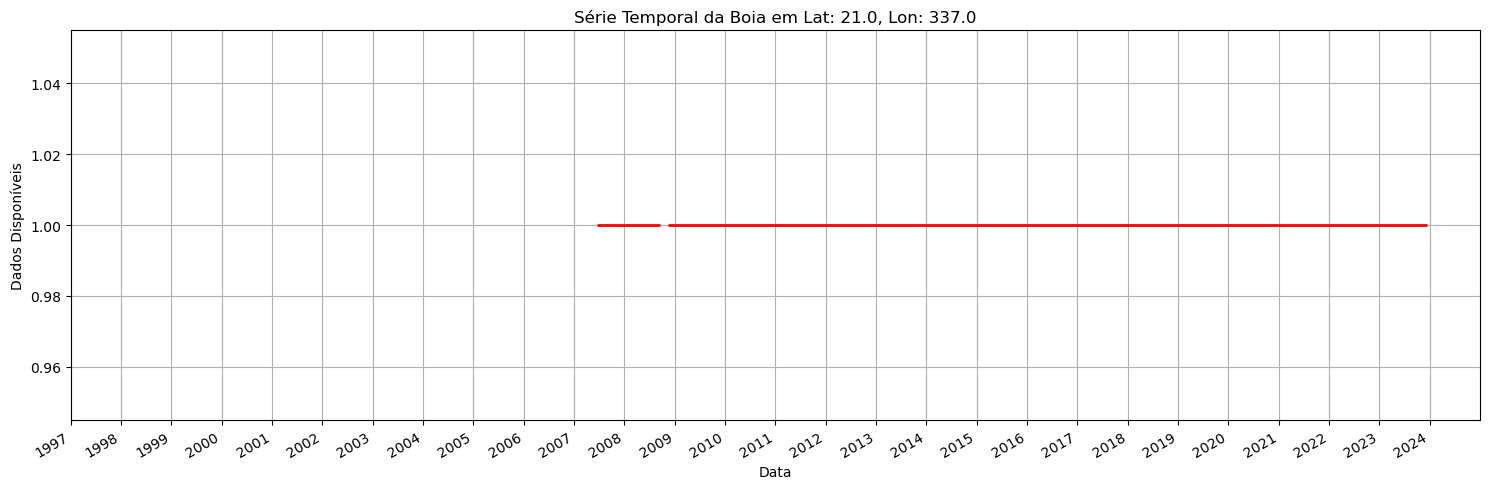

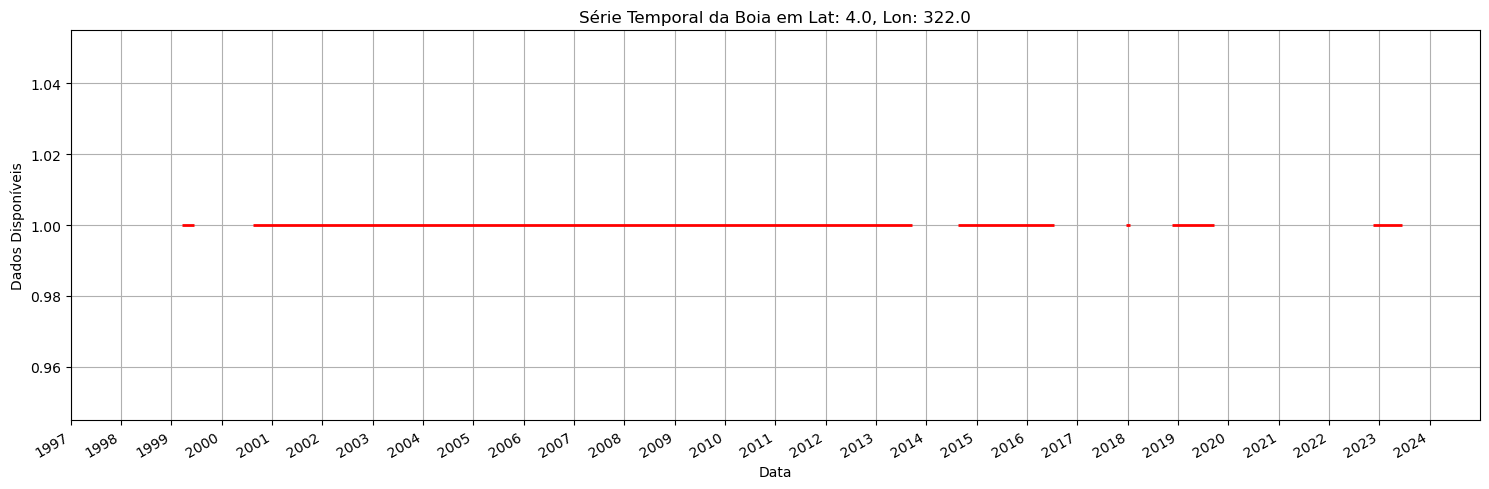

In [37]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]  # A variável 'time' geralmente está em dias desde uma data base
    temperatura = ds.variables['AT_21'][:]
    
    fill_value = 1e35  
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze() 

    # Converte o tempo de unidades relativas (dias desde uma data) para objetos datetime
    datas = nc.num2date(tempo, units=ds.variables['time'].units)

    return lat, lon, datas, temperatura

caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/AirT/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

def plotar_serie_temporal(datas, temperatura, titulo):
    plt.figure(figsize=(15,5))

    datas_convertidas = [datetime.datetime(date.year, date.month, date.day) for date in datas]
    datas_num = mdates.date2num(datas_convertidas)
    
    temperatura = np.array(temperatura)
    
    plt.title(titulo)
    plt.xlabel('Data')
    plt.ylabel('Dados Disponíveis')
    plt.grid(True)
    
    # Define os limites do eixo x para o intervalo de interesse
    plt.xlim([mdates.date2num(datetime.datetime(1997, 1, 1)), mdates.date2num(datetime.datetime(2024, 12, 31))])
    
    # Formatar o eixo x para mostrar apenas o ano
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())

    # Inicializa as variáveis para encontrar os períodos contínuos
    inicio_periodo = None
    for i, temp in enumerate(temperatura):
        if inicio_periodo is None and not np.isnan(temp):
            # Encontramos o início de um novo período de dados
            inicio_periodo = datas_num[i]
        elif inicio_periodo is not None and np.isnan(temp):
            # Encontramos o fim de um período de dados
            fim_periodo = datas_num[i - 1]
            plt.hlines(y=1, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)
            inicio_periodo = None

    # Verifica se o último período vai até o final dos dados
    if inicio_periodo is not None and not np.isnan(temperatura[-1]):
        fim_periodo = datas_num[-1]
        plt.hlines(y=1, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)

    plt.gcf().autofmt_xdate()  # Rotação automática das datas para melhor visualização
    plt.tight_layout()
    plt.show()


for arquivo in arquivos_netCDF:
    lat, lon, datas, temperatura = ler_dados(arquivo)
    titulo = f"Série Temporal da Boia em Lat: {lat.mean():.1f}, Lon: {lon.mean():.1f}"
    plotar_serie_temporal(datas, temperatura, titulo)


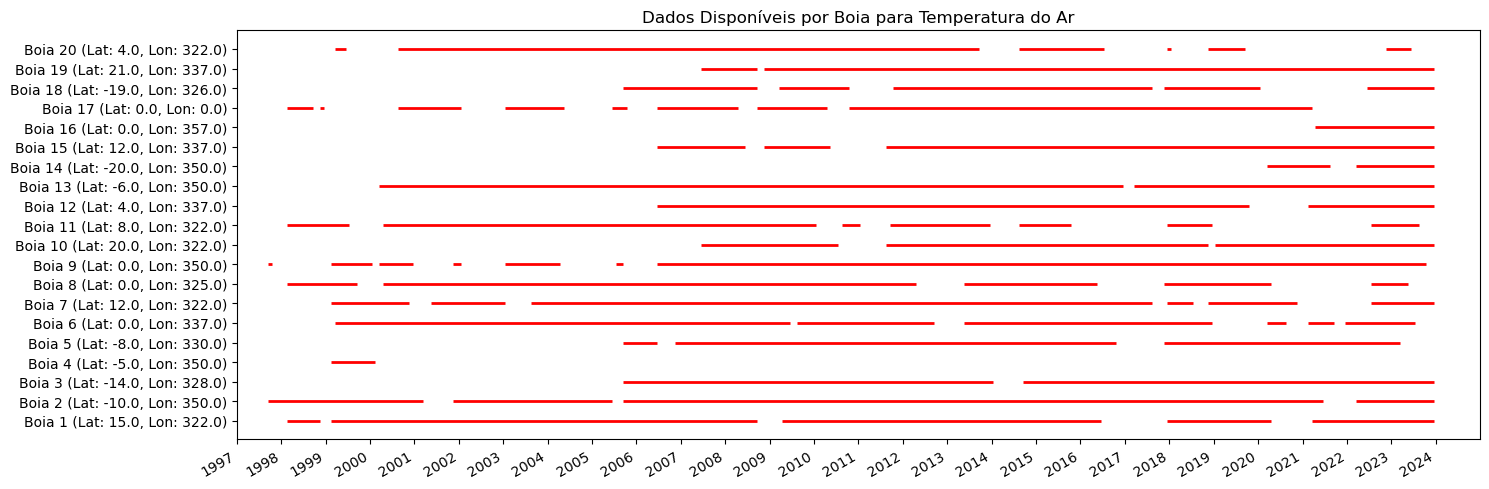

In [42]:
import glob
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

def ler_dados(arquivo):
    ds = nc.Dataset(arquivo)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    tempo = ds.variables['time'][:]
    temperatura = ds.variables['AT_21'][:]
    
    fill_value = 1e35  
    temperatura = np.where(temperatura == fill_value, np.nan, temperatura)
    temperatura = temperatura.squeeze()

    datas = nc.num2date(tempo, units=ds.variables['time'].units)

    return lat.mean(), lon.mean(), datas, temperatura

caminho_pasta = "/home/leticia/Documentos/MESTRADO/quali/Dados/AirT/*.cdf"
arquivos_netCDF = glob.glob(caminho_pasta)

def plotar_series_temporais(dados_boias, titulo):
    plt.figure(figsize=(15,5))
    
    plt.title(titulo)
    plt.xlabel('')
    plt.ylabel('')

    for i, (lat, lon, datas, temperatura) in enumerate(dados_boias):
        datas_convertidas = [datetime.datetime(date.year, date.month, date.day) for date in datas]
        datas_num = mdates.date2num(datas_convertidas)

        inicio_periodo = None
        for j, temp in enumerate(temperatura):
            if inicio_periodo is None and not np.isnan(temp):
                inicio_periodo = datas_num[j]
            elif inicio_periodo is not None and np.isnan(temp):
                fim_periodo = datas_num[j - 1]
                plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)
                inicio_periodo = None

        if inicio_periodo is not None and not np.isnan(temperatura[-1]):
            fim_periodo = datas_num[-1]
            plt.hlines(y=i, xmin=inicio_periodo, xmax=fim_periodo, colors='r', linestyles='solid', linewidth=2)

    plt.yticks(range(len(dados_boias)), [f'Boia {i+1} (Lat: {lat:.1f}, Lon: {lon:.1f})' for i, (lat, lon, _, _) in enumerate(dados_boias)])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xlim([mdates.date2num(datetime.datetime(1997, 1, 1)), mdates.date2num(datetime.datetime(2024, 12, 31))])
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()

dados_boias = []
for arquivo in arquivos_netCDF:
    dados_boia = ler_dados(arquivo)
    dados_boias.append(dados_boia)

plotar_series_temporais(dados_boias, "Dados Disponíveis por Boia para Temperatura do Ar")
